In [2]:
# pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 
  
# metadata 
print(cdc_diabetes_health_indicators.metadata) 
  
# variable information 
print(cdc_diabetes_health_indicators.variables) 


{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [4]:
X['Education']

0         4
1         6
2         4
3         3
4         5
         ..
253675    6
253676    2
253677    5
253678    5
253679    6
Name: Education, Length: 253680, dtype: int64

In [5]:
cdc_diabetes_health_indicators.data

{'ids':             ID
 0            0
 1            1
 2            2
 3            3
 4            4
 ...        ...
 253675  253675
 253676  253676
 253677  253677
 253678  253678
 253679  253679
 
 [253680 rows x 1 columns],
 'features':         HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
 0            1         1          1   40       1       0   
 1            0         0          0   25       1       0   
 2            1         1          1   28       0       0   
 3            1         0          1   27       0       0   
 4            1         1          1   24       0       0   
 ...        ...       ...        ...  ...     ...     ...   
 253675       1         1          1   45       0       0   
 253676       1         1          1   18       0       0   
 253677       0         0          1   28       0       0   
 253678       1         0          1   23       0       0   
 253679       1         1          1   25       0       0   
 
         HeartDiseaseorAt

In [6]:
y

Diabetes_binary
0                     0
1                     0
2                     0
3                     0
4                     0
...                 ...
253675                0
253676                1
253677                0
253678                0
253679                1

[253680 rows x 1 columns]

In [184]:
#!pip install keras==2.12.0

In [183]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping


In [8]:

df = pd.concat([X, y], axis=1)


In [9]:
df.head()

HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1   40       1       0                     0   
1       0         0          0   25       1       0                     0   
2       1         1          1   28       0       0                     0   
3       1         0          1   27       0       0                     0   
4       1         1          1   24       0       0                     0   

   PhysActivity  Fruits  Veggies  ...  NoDocbcCost  GenHlth  MentHlth  \
0             0       0        1  ...            0        5        18   
1             1       0        0  ...            1        3         0   
2             0       1        0  ...            1        5        30   
3             1       1        1  ...            0        2         0   
4             1       1        1  ...            0        2         3   

   PhysHlth  DiffWalk  Sex  Age  Education  Income  Diabetes_binary  
0        15         1    0    9          4       3                0  
1         0         0    0    7          6       1                0  
2        30         1    0    9          4       8                0  
3         0         0    0   11          3       6                0  
4         0         0    0   11          5       4                0  

[5 rows x 22 columns]

In [10]:
df.corr()

HighBP  HighChol  CholCheck       BMI    Smoker  \
HighBP                1.000000  0.298199   0.098508  0.213748  0.096991   
HighChol              0.298199  1.000000   0.085642  0.106722  0.091299   
CholCheck             0.098508  0.085642   1.000000  0.034495 -0.009929   
BMI                   0.213748  0.106722   0.034495  1.000000  0.013804   
Smoker                0.096991  0.091299  -0.009929  0.013804  1.000000   
Stroke                0.129575  0.092620   0.024158  0.020153  0.061173   
HeartDiseaseorAttack  0.209361  0.180765   0.044206  0.052904  0.114441   
PhysActivity         -0.125267 -0.078046   0.004190 -0.147294 -0.087401   
Fruits               -0.040555 -0.040859   0.023849 -0.087518 -0.077666   
Veggies              -0.061266 -0.039874   0.006121 -0.062275 -0.030678   
HvyAlcoholConsump    -0.003972 -0.011543  -0.023730 -0.048736  0.101619   
AnyHealthcare         0.038425  0.042230   0.117626 -0.018471 -0.023251   
NoDocbcCost           0.017358  0.013310  -0.058255  0.058206  0.048946   
GenHlth               0.300530  0.208426   0.046589  0.239185  0.163143   
MentHlth              0.056456  0.062069  -0.008366  0.085310  0.092196   
PhysHlth              0.161212  0.121751   0.031775  0.121141  0.116460   
DiffWalk              0.223618  0.144672   0.040585  0.197078  0.122463   
Sex                   0.052207  0.031205  -0.022115  0.042950  0.093662   
Age                   0.344452  0.272318   0.090321 -0.036618  0.120641   
Education            -0.141358 -0.070802   0.001510 -0.103932 -0.161955   
Income               -0.171235 -0.085459   0.014259 -0.100069 -0.123937   
Diabetes_binary       0.263129  0.200276   0.064761  0.216843  0.060789   

                        Stroke  HeartDiseaseorAttack  PhysActivity    Fruits  \
HighBP                0.129575              0.209361     -0.125267 -0.040555   
HighChol              0.092620              0.180765     -0.078046 -0.040859   
CholCheck             0.024158              0.044206      0.004190  0.023849   
BMI                   0.020153              0.052904     -0.147294 -0.087518   
Smoker                0.061173              0.114441     -0.087401 -0.077666   
Stroke                1.000000              0.203002     -0.069151 -0.013389   
HeartDiseaseorAttack  0.203002              1.000000     -0.087299 -0.019790   
PhysActivity         -0.069151             -0.087299      1.000000  0.142756   
Fruits               -0.013389             -0.019790      0.142756  1.000000   
Veggies              -0.041124             -0.039167      0.153150  0.254342   
HvyAlcoholConsump    -0.016950             -0.028991      0.012392 -0.035288   
AnyHealthcare         0.008776              0.018734      0.035505  0.031544   
NoDocbcCost           0.034804              0.031000     -0.061638 -0.044243   
GenHlth               0.177942              0.258383     -0.266186 -0.103854   
MentHlth              0.070172              0.064621     -0.125587 -0.068217   
PhysHlth              0.148944              0.181698     -0.219230 -0.044633   
DiffWalk              0.176567              0.212709     -0.253174 -0.048352   
Sex                   0.002978              0.086096      0.032482 -0.091175   
Age                   0.126974              0.221618     -0.092511  0.064547   
Education            -0.076009             -0.099600      0.199658  0.110187   
Income               -0.128599             -0.141011      0.198539  0.079929   
Diabetes_binary       0.105816              0.177282     -0.118133 -0.040779   

                       Veggies  ...  NoDocbcCost   GenHlth  MentHlth  \
HighBP               -0.061266  ...     0.017358  0.300530  0.056456   
HighChol             -0.039874  ...     0.013310  0.208426  0.062069   
CholCheck             0.006121  ...    -0.058255  0.046589 -0.008366   
BMI                  -0.062275  ...     0.058206  0.239185  0.085310   
Smoker               -0.030678  ...     0.048946  0.163143  0.092196   
Stroke               -0.0

<AxesSubplot:>

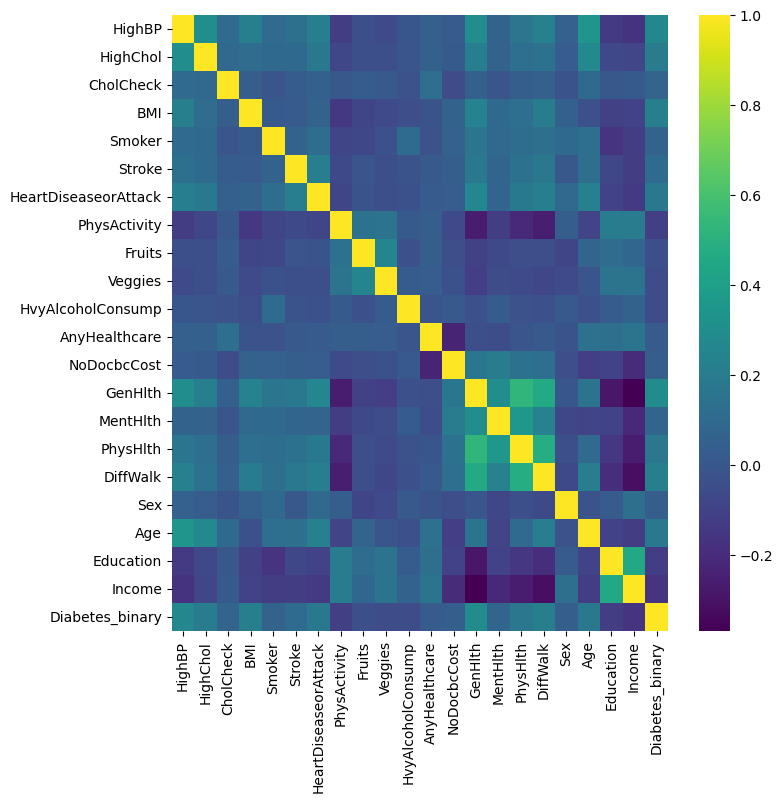

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cmap="viridis") 

In [12]:
df.describe()

HighBP       HighChol      CholCheck            BMI  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.429001       0.424121       0.962670      28.382364   
std         0.494934       0.494210       0.189571       6.608694   
min         0.000000       0.000000       0.000000      12.000000   
25%         0.000000       0.000000       1.000000      24.000000   
50%         0.000000       0.000000       1.000000      27.000000   
75%         1.000000       1.000000       1.000000      31.000000   
max         1.000000       1.000000       1.000000      98.000000   

              Smoker         Stroke  HeartDiseaseorAttack   PhysActivity  \
count  253680.000000  253680.000000         253680.000000  253680.000000   
mean        0.443169       0.040571              0.094186       0.756544   
std         0.496761       0.197294              0.292087       0.429169   
min         0.000000       0.000000              0.000000       0.000000   
25%         0.000000       0.000000              0.000000       1.000000   
50%         0.000000       0.000000              0.000000       1.000000   
75%         1.000000       0.000000              0.000000       1.000000   
max         1.000000       1.000000              1.000000       1.000000   

              Fruits        Veggies  ...    NoDocbcCost        GenHlth  \
count  253680.000000  253680.000000  ...  253680.000000  253680.000000   
mean        0.634256       0.811420  ...       0.084177       2.511392   
std         0.481639       0.391175  ...       0.277654       1.068477   
min         0.000000       0.000000  ...       0.000000       1.000000   
25%         0.000000       1.000000  ...       0.000000       2.000000   
50%         1.000000       1.000000  ...       0.000000       2.000000   
75%         1.000000       1.000000  ...       0.000000       3.000000   
max         1.000000       1.000000  ...       1.000000       5.000000   

            MentHlth       PhysHlth       DiffWalk            Sex  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        3.184772       4.242081       0.168224       0.440342   
std         7.412847       8.717951       0.374066       0.496429   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         2.000000       3.000000       0.000000       1.000000   
max        30.000000      30.000000       1.000000       1.000000   

                 Age      Education         Income  Diabetes_binary  
count  253680.000000  253680.000000  253680.000000    253680.000000  
mean        8.032119       5.050434       6.053875         0.139333  
std         3.054220       0.985774       2.071148         0.346294  
min         1.000000       1.000000       1.000000         0.000000  
25%         6.000000       4.000000       5.000000         0.000000  
50%         8.000000       5.000000       7.000000         0.000000  
75%        10.000000       6.000000       8.000000         0.000000  
max        13.000000       6.000000       8.000000         1.000000  

[8 rows x 22 columns]

In [13]:
df.shape

(253680, 22)

In [14]:
df.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_binary'],
      dtype='object')

In [15]:
df.duplicated().sum()

24206

In [16]:
df.drop_duplicates(inplace = True)

In [17]:
df.duplicated().sum()

0

In [18]:
df['Sex'].value_counts()

0    128715
1    100759
Name: Sex, dtype: int64

In [19]:
df['Diabetes_binary'].value_counts()

0    194377
1     35097
Name: Diabetes_binary, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='count'>

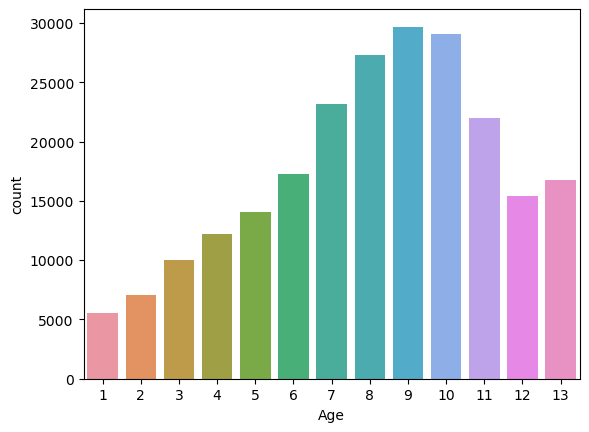

In [20]:
sns.countplot(x='Age',data=df)

In [21]:
correlation = df['PhysActivity'].corr(df['Diabetes_binary'])
print(f'Correlation between Smoker and Diabetes_binary: {correlation}')

Correlation between Smoker and Diabetes_binary: -0.1004043316220524


In [22]:
correlation_table = pd.DataFrame(df.corrwith(df['Diabetes_binary']), columns=['Correlation'])
correlation_table


Correlation
HighBP                   0.254318
HighChol                 0.194944
CholCheck                0.072523
BMI                      0.205086
Smoker                   0.045504
Stroke                   0.099193
HeartDiseaseorAttack     0.168213
PhysActivity            -0.100404
Fruits                  -0.024805
Veggies                 -0.041734
HvyAlcoholConsump       -0.065950
AnyHealthcare            0.025331
NoDocbcCost              0.020048
GenHlth                  0.276940
MentHlth                 0.054153
PhysHlth                 0.156211
DiffWalk                 0.205302
Sex                      0.032724
Age                      0.177263
Education               -0.102686
Income                  -0.140659
Diabetes_binary          1.000000

In [23]:
df.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_binary'],
      dtype='object')

<AxesSubplot:xlabel='HighBP', ylabel='count'>

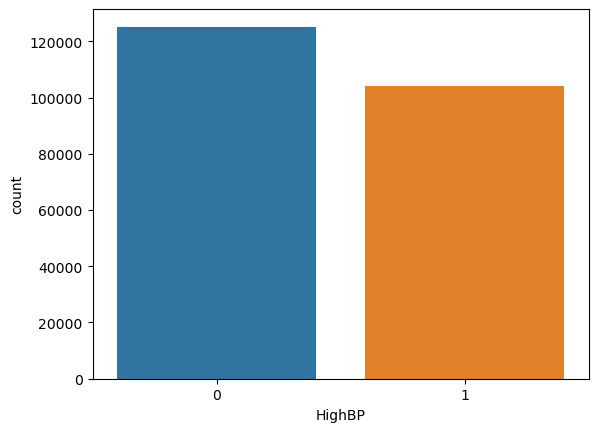

In [24]:
sns.countplot(x='HighBP',data=df)

<AxesSubplot:xlabel='AnyHealthcare', ylabel='count'>

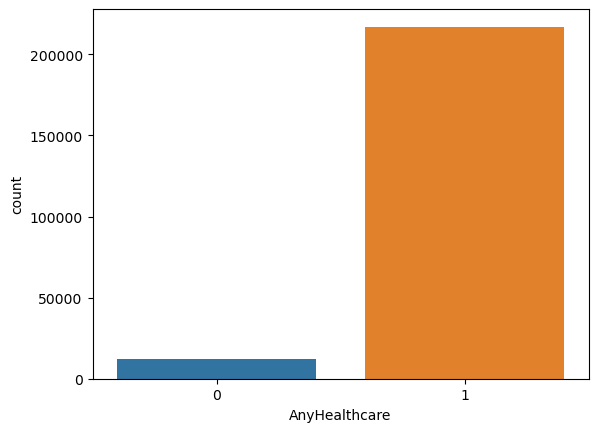

In [25]:
sns.countplot(x='AnyHealthcare',data=df) 

<AxesSubplot:xlabel='MentHlth', ylabel='count'>

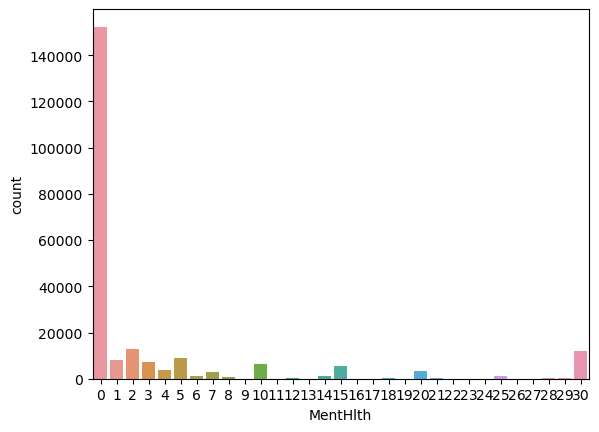

In [26]:
sns.countplot(x='MentHlth',data=df)  

<AxesSubplot:xlabel='PhysHlth', ylabel='count'>

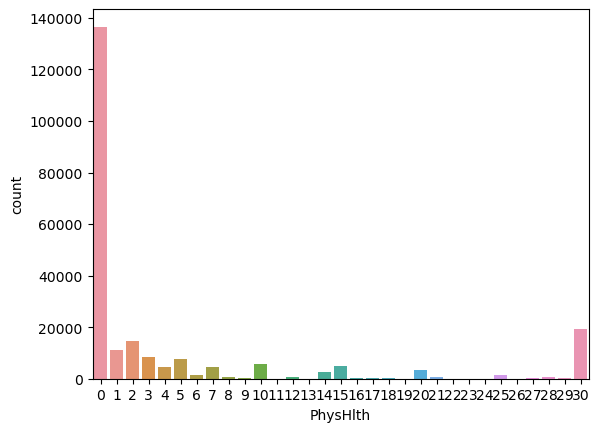

In [27]:
sns.countplot(x='PhysHlth',data=df) 

<AxesSubplot:xlabel='Sex', ylabel='count'>

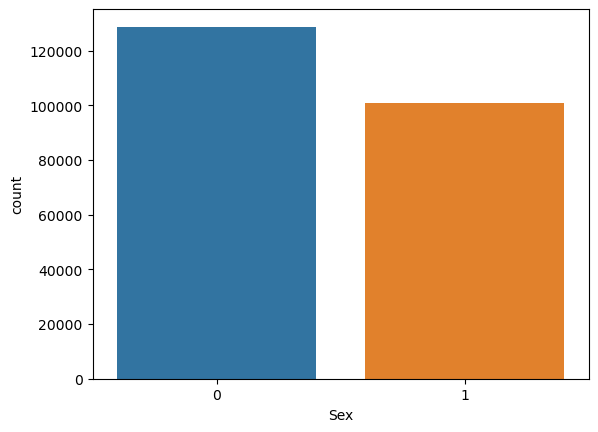

In [28]:
sns.countplot(x='Sex',data=df) 

<AxesSubplot:xlabel='Education', ylabel='count'>

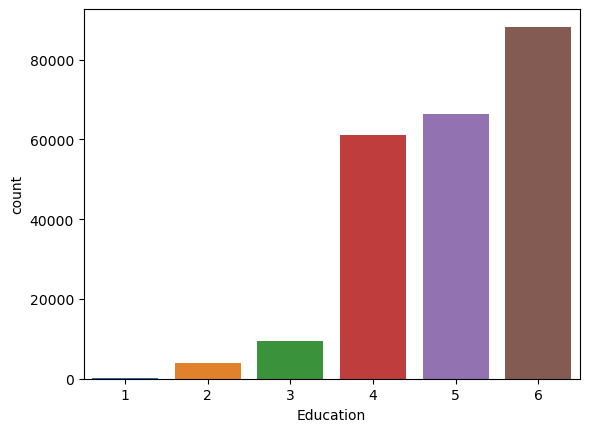

In [29]:
sns.countplot(x='Education', data=df) 

<AxesSubplot:xlabel='Education', ylabel='count'>

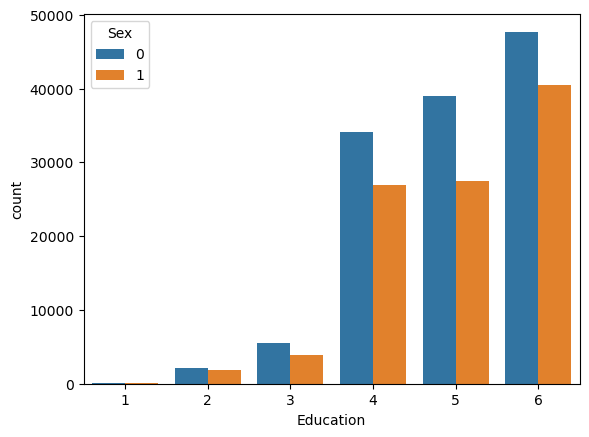

In [30]:
sns.countplot(x='Education',hue="Sex", data=df) 

<AxesSubplot:xlabel='Education', ylabel='count'>

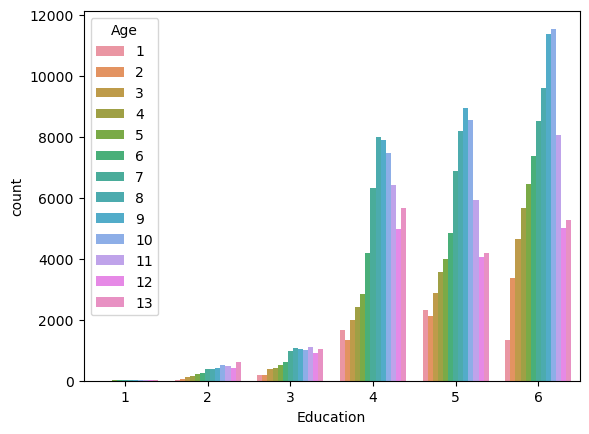

In [31]:
sns.countplot(x='Education',hue="Age", data=df) 

## How many people with a college degree have Diabetes?

<AxesSubplot:xlabel='Education', ylabel='count'>

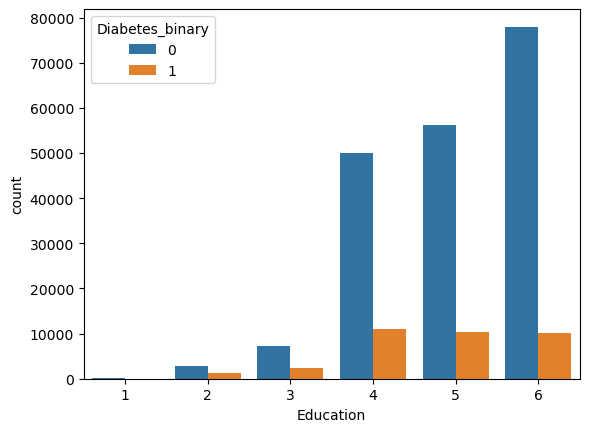

In [32]:
sns.countplot(x='Education', hue="Diabetes_binary", data=df) 

<AxesSubplot:xlabel='Income', ylabel='count'>

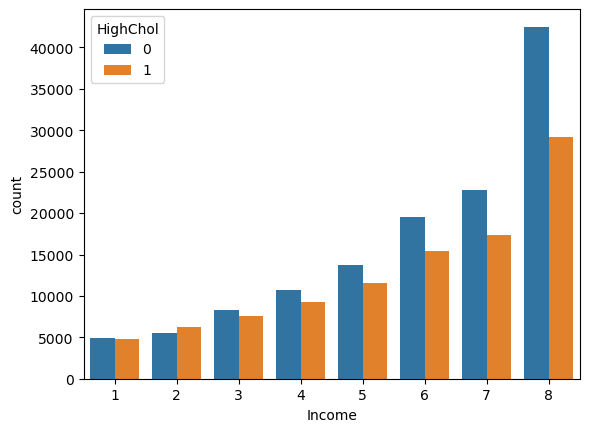

In [33]:
sns.countplot(x='Income',hue="HighChol", data=df) 

In [34]:
correlation_table = pd.DataFrame(df.corrwith(df['Income']), columns=['Correlation'])
correlation_table


Correlation
HighBP                  -0.140030
HighChol                -0.062089
CholCheck                0.001989
BMI                     -0.069097
Smoker                  -0.095314
Stroke                  -0.117108
HeartDiseaseorAttack    -0.122728
PhysActivity             0.165869
Fruits                   0.050907
Veggies                  0.125068
HvyAlcoholConsump        0.071863
AnyHealthcare            0.146144
NoDocbcCost             -0.187577
GenHlth                 -0.331782
MentHlth                -0.185689
PhysHlth                -0.240929
DiffWalk                -0.299064
Sex                      0.130997
Age                     -0.116361
Education                0.419045
Income                   1.000000
Diabetes_binary         -0.140659

In [35]:
df["Education"].value_counts()

6    88225
5    66444
4    61124
3     9467
2     4040
1      174
Name: Education, dtype: int64

In [36]:
df.head()

HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1   40       1       0                     0   
1       0         0          0   25       1       0                     0   
2       1         1          1   28       0       0                     0   
3       1         0          1   27       0       0                     0   
4       1         1          1   24       0       0                     0   

   PhysActivity  Fruits  Veggies  ...  NoDocbcCost  GenHlth  MentHlth  \
0             0       0        1  ...            0        5        18   
1             1       0        0  ...            1        3         0   
2             0       1        0  ...            1        5        30   
3             1       1        1  ...            0        2         0   
4             1       1        1  ...            0        2         3   

   PhysHlth  DiffWalk  Sex  Age  Education  Income  Diabetes_binary  
0        15         1    0    9          4       3                0  
1         0         0    0    7          6       1                0  
2        30         1    0    9          4       8                0  
3         0         0    0   11          3       6                0  
4         0         0    0   11          5       4                0  

[5 rows x 22 columns]

In [37]:
def v_counts(df):
    for i in df :
        print(df[i].value_counts())
        print("_____________________________________________________________________________")

In [38]:
v_counts(df)

0    125214
1    104260
Name: HighBP, dtype: int64
_____________________________________________________________________________
0    128129
1    101345
Name: HighChol, dtype: int64
_____________________________________________________________________________
1    220176
0      9298
Name: CholCheck, dtype: int64
_____________________________________________________________________________
27    21514
26    17775
24    16497
28    14914
25    14793
      ...  
85        1
91        1
86        1
90        1
78        1
Name: BMI, Length: 84, dtype: int64
_____________________________________________________________________________
0    122585
1    106889
Name: Smoker, dtype: int64
_____________________________________________________________________________
0    219190
1     10284
Name: Stroke, dtype: int64
_____________________________________________________________________________
0    205761
1     23713
Name: HeartDiseaseorAttack, dtype: int64
_______________________________________

In [39]:
#pip install pandas-profiling

In [40]:
from pandas_profiling import ProfileReport
ProfileReport(df)

C:\Users\nitin\AppData\Local\Temp\ipykernel_64776\2181367630.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [43]:
df.isnull().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229474 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                229474 non-null  int64
 1   HighChol              229474 non-null  int64
 2   CholCheck             229474 non-null  int64
 3   BMI                   229474 non-null  int64
 4   Smoker                229474 non-null  int64
 5   Stroke                229474 non-null  int64
 6   HeartDiseaseorAttack  229474 non-null  int64
 7   PhysActivity          229474 non-null  int64
 8   Fruits                229474 non-null  int64
 9   Veggies               229474 non-null  int64
 10  HvyAlcoholConsump     229474 non-null  int64
 11  AnyHealthcare         229474 non-null  int64
 12  NoDocbcCost           229474 non-null  int64
 13  GenHlth               229474 non-null  int64
 14  MentHlth              229474 non-null  int64
 15  PhysHlth              229474 non-n

In [45]:
df.nunique()

HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
Diabetes_binary          2
dtype: int64

In [46]:
df.head()

HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1   40       1       0                     0   
1       0         0          0   25       1       0                     0   
2       1         1          1   28       0       0                     0   
3       1         0          1   27       0       0                     0   
4       1         1          1   24       0       0                     0   

   PhysActivity  Fruits  Veggies  ...  NoDocbcCost  GenHlth  MentHlth  \
0             0       0        1  ...            0        5        18   
1             1       0        0  ...            1        3         0   
2             0       1        0  ...            1        5        30   
3             1       1        1  ...            0        2         0   
4             1       1        1  ...            0        2         3   

   PhysHlth  DiffWalk  Sex  Age  Education  Income  Diabetes_binary  
0        15         1    0    9          4       3                0  
1         0         0    0    7          6       1                0  
2        30         1    0    9          4       8                0  
3         0         0    0   11          3       6                0  
4         0         0    0   11          5       4                0  

[5 rows x 22 columns]

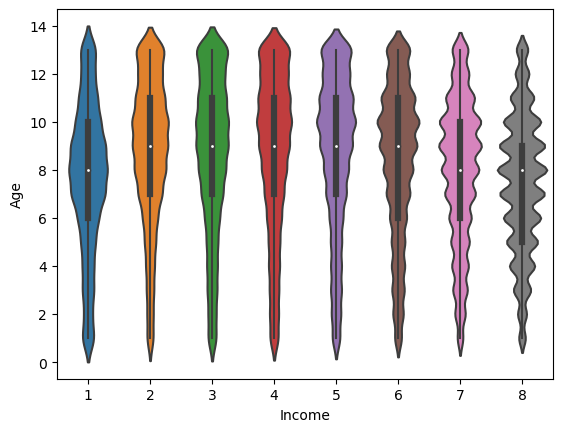

In [48]:


sns.violinplot(x='Income', y='Age', data=df)


plt.show()

In [49]:
df.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_binary'],
      dtype='object')

In [50]:
df

HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0            1         1          1   40       1       0   
1            0         0          0   25       1       0   
2            1         1          1   28       0       0   
3            1         0          1   27       0       0   
4            1         1          1   24       0       0   
...        ...       ...        ...  ...     ...     ...   
253675       1         1          1   45       0       0   
253676       1         1          1   18       0       0   
253677       0         0          1   28       0       0   
253678       1         0          1   23       0       0   
253679       1         1          1   25       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  NoDocbcCost  \
0                          0             0       0        1  ...            0   
1                          0             1       0        0  ...            1   
2                          0             0       1        0  ...            1   
3                          0             1       1        1  ...            0   
4                          0             1       1        1  ...            0   
...                      ...           ...     ...      ...  ...          ...   
253675                     0             0       1        1  ...            0   
253676                     0             0       0        0  ...            0   
253677                     0             1       1        0  ...            0   
253678                     0             0       1        1  ...            0   
253679                     1             1       1        0  ...            0   

        GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  Income  \
0             5        18        15         1    0    9          4       3   
1             3         0         0         0    0    7          6       1   
2             5        30        30         1    0    9          4       8   
3             2         0         0         0    0   11          3       6   
4             2         3         0         0    0   11          5       4   
...         ...       ...       ...       ...  ...  ...        ...     ...   
253675        3         0         5         0    1    5          6       7   
253676        4         0         0         1    0   11          2       4   
253677        1         0         0         0    0    2          5       2   
253678        3         0         0         0    1    7          5       1   
253679        2         0         0         0    0    9          6       2   

        Diabetes_binary  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
253675                0  
253676                1  
253677                0  
253678                0  
253679                1  

[229474 rows x 22 columns]

In [51]:
df_2=df.copy()

In [52]:
df_2

HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0            1         1          1   40       1       0   
1            0         0          0   25       1       0   
2            1         1          1   28       0       0   
3            1         0          1   27       0       0   
4            1         1          1   24       0       0   
...        ...       ...        ...  ...     ...     ...   
253675       1         1          1   45       0       0   
253676       1         1          1   18       0       0   
253677       0         0          1   28       0       0   
253678       1         0          1   23       0       0   
253679       1         1          1   25       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  NoDocbcCost  \
0                          0             0       0        1  ...            0   
1                          0             1       0        0  ...            1   
2                          0             0       1        0  ...            1   
3                          0             1       1        1  ...            0   
4                          0             1       1        1  ...            0   
...                      ...           ...     ...      ...  ...          ...   
253675                     0             0       1        1  ...            0   
253676                     0             0       0        0  ...            0   
253677                     0             1       1        0  ...            0   
253678                     0             0       1        1  ...            0   
253679                     1             1       1        0  ...            0   

        GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  Income  \
0             5        18        15         1    0    9          4       3   
1             3         0         0         0    0    7          6       1   
2             5        30        30         1    0    9          4       8   
3             2         0         0         0    0   11          3       6   
4             2         3         0         0    0   11          5       4   
...         ...       ...       ...       ...  ...  ...        ...     ...   
253675        3         0         5         0    1    5          6       7   
253676        4         0         0         1    0   11          2       4   
253677        1         0         0         0    0    2          5       2   
253678        3         0         0         0    1    7          5       1   
253679        2         0         0         0    0    9          6       2   

        Diabetes_binary  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
253675                0  
253676                1  
253677                0  
253678                0  
253679                1  

[229474 rows x 22 columns]

In [53]:
df_2.duplicated().sum()

0

In [54]:
df_2.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_binary'],
      dtype='object')

In [55]:
df_2.HighBP[df_2['HighBP'] == 0] = 'BP Not High'
df_2.HighBP[df_2['HighBP'] == 1] = 'High BP'

In [56]:
df_2

HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0           High BP         1          1   40       1       0   
1       BP Not High         0          0   25       1       0   
2           High BP         1          1   28       0       0   
3           High BP         0          1   27       0       0   
4           High BP         1          1   24       0       0   
...             ...       ...        ...  ...     ...     ...   
253675      High BP         1          1   45       0       0   
253676      High BP         1          1   18       0       0   
253677  BP Not High         0          1   28       0       0   
253678      High BP         0          1   23       0       0   
253679      High BP         1          1   25       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  NoDocbcCost  \
0                          0             0       0        1  ...            0   
1                          0             1       0        0  ...            1   
2                          0             0       1        0  ...            1   
3                          0             1       1        1  ...            0   
4                          0             1       1        1  ...            0   
...                      ...           ...     ...      ...  ...          ...   
253675                     0             0       1        1  ...            0   
253676                     0             0       0        0  ...            0   
253677                     0             1       1        0  ...            0   
253678                     0             0       1        1  ...            0   
253679                     1             1       1        0  ...            0   

        GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  Income  \
0             5        18        15         1    0    9          4       3   
1             3         0         0         0    0    7          6       1   
2             5        30        30         1    0    9          4       8   
3             2         0         0         0    0   11          3       6   
4             2         3         0         0    0   11          5       4   
...         ...       ...       ...       ...  ...  ...        ...     ...   
253675        3         0         5         0    1    5          6       7   
253676        4         0         0         1    0   11          2       4   
253677        1         0         0         0    0    2          5       2   
253678        3         0         0         0    1    7          5       1   
253679        2         0         0         0    0    9          6       2   

        Diabetes_binary  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
253675                0  
253676                1  
253677                0  
253678                0  
253679                1  

[229474 rows x 22 columns]

In [57]:
df_2.HighChol[df_2['HighChol'] == 0] = 'No High Cholesterol'
df_2.HighChol[df_2['HighChol'] == 1] = 'High Cholesterol'

df_2.CholCheck[df_2['CholCheck'] == 0] = 'No cholesterol check in 5 years'
df_2.CholCheck[df_2['CholCheck'] == 1] = 'Yes cholesterol check in 5 years'

df_2.Smoker[df_2['Smoker'] == 0] = 'No'
df_2.Smoker[df_2['Smoker'] == 1] = 'Yes' 

df_2.Stroke[df_2['Stroke'] == 0] = 'No'
df_2.Stroke[df_2['Stroke'] == 1] = 'Yes'

df_2.HeartDiseaseorAttack[df_2['HeartDiseaseorAttack'] == 0] = 'No'
df_2.HeartDiseaseorAttack[df_2['HeartDiseaseorAttack'] == 1] = 'Yes'

df_2.PhysActivity[df_2['PhysActivity'] == 0] = 'No'
df_2.PhysActivity[df_2['PhysActivity'] == 1] = 'Yes'

df_2.Fruits[df_2['Fruits'] == 0] = 'No'
df_2.Fruits[df_2['Fruits'] == 1] = 'Yes'

df_2.Veggies[df_2['Veggies'] == 0] = 'No'
df_2.Veggies[df_2['Veggies'] == 1] = 'Yes'

df_2.HvyAlcoholConsump[df_2['HvyAlcoholConsump'] == 0] = 'No'
df_2.HvyAlcoholConsump[df_2['HvyAlcoholConsump'] == 1] = 'Yes'

df_2.AnyHealthcare[df_2['AnyHealthcare'] == 0] = 'No'
df_2.AnyHealthcare[df_2['AnyHealthcare'] == 1] = 'Yes'

df_2.NoDocbcCost[df_2['NoDocbcCost'] == 0] = 'No'
df_2.NoDocbcCost[df_2['NoDocbcCost'] == 1] = 'Yes'

df_2.GenHlth[df_2['GenHlth'] == 1] = 'Excellent'
df_2.GenHlth[df_2['GenHlth'] == 2] = 'Very Good'
df_2.GenHlth[df_2['GenHlth'] == 3] = 'Good'
df_2.GenHlth[df_2['GenHlth'] == 4] = 'Fair'
df_2.GenHlth[df_2['GenHlth'] == 5] = 'Poor'

df_2.DiffWalk[df_2['DiffWalk'] == 0] = 'No'
df_2.DiffWalk[df_2['DiffWalk'] == 1] = 'Yes'

df_2.Sex[df_2['Sex'] == 0] = 'No'
df_2.Sex[df_2['Sex'] == 1] = 'Yes'

df_2.Age[df_2['Age'] == 1] = '18-24'
df_2.Age[df_2['Age'] == 2] = '25-29'
df_2.Age[df_2['Age'] == 3] = '30-34'
df_2.Age[df_2['Age'] == 4] = '35-39'
df_2.Age[df_2['Age'] == 5] = '40-44'
df_2.Age[df_2['Age'] == 6] = '45-49'
df_2.Age[df_2['Age'] == 7] = '50-54'
df_2.Age[df_2['Age'] == 8] = '55-59'
df_2.Age[df_2['Age'] == 9] = '60-64'
df_2.Age[df_2['Age'] == 10] = '65-69'
df_2.Age[df_2['Age'] == 11] = '70-74'
df_2.Age[df_2['Age'] == 12] = '75-79'
df_2.Age[df_2['Age'] == 13] = '80 or older'

df_2.Education[df_2['Education'] == 1] = 'Never attended school/Kindergarten'
df_2.Education[df_2['Education'] == 2] = 'Elementary School'
df_2.Education[df_2['Education'] == 3] = 'Attended High School (Some)'
df_2.Education[df_2['Education'] == 4] = 'High School Graduate'
df_2.Education[df_2['Education'] == 5] = 'Attended College or Technical School (Some)'
df_2.Education[df_2['Education'] == 6] = 'College Graduate'


df_2.Income[df_2['Income'] == 1] = 'Less than $10,000'
df_2.Income[df_2['Income'] == 2] = '$10,000 - $15,000'
df_2.Income[df_2['Income'] == 3] = '$15,000 - $20,000'
df_2.Income[df_2['Income'] == 4] = '$20,000 - $25,000'
df_2.Income[df_2['Income'] == 5] = '$25,000 - $35,000'
df_2.Income[df_2['Income'] == 6] = '$35,000 - $50,000'
df_2.Income[df_2['Income'] == 7] = '$50,000 - $75,000'
df_2.Income[df_2['Income'] == 8] = '$75,000 +'

df_2.Diabetes_binary[df_2['Diabetes_binary'] == 0] = 'No Diabetes'
df_2.Diabetes_binary[df_2['Diabetes_binary'] == 1] = 'Diabetes'




C:\Users\nitin\AppData\Local\Temp\ipykernel_64776\2159284079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.HighChol[df_2['HighChol'] == 0] = 'No High Cholesterol'
C:\Users\nitin\AppData\Local\Temp\ipykernel_64776\2159284079.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.CholCheck[df_2['CholCheck'] == 0] = 'No cholesterol check in 5 years'
C:\Users\nitin\AppData\Local\Temp\ipykernel_64776\2159284079.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [58]:
df_2.head(10)

HighBP             HighChol                         CholCheck  BMI  \
0      High BP     High Cholesterol  Yes cholesterol check in 5 years   40   
1  BP Not High  No High Cholesterol   No cholesterol check in 5 years   25   
2      High BP     High Cholesterol  Yes cholesterol check in 5 years   28   
3      High BP  No High Cholesterol  Yes cholesterol check in 5 years   27   
4      High BP     High Cholesterol  Yes cholesterol check in 5 years   24   
5      High BP     High Cholesterol  Yes cholesterol check in 5 years   25   
6      High BP  No High Cholesterol  Yes cholesterol check in 5 years   30   
7      High BP     High Cholesterol  Yes cholesterol check in 5 years   25   
8      High BP     High Cholesterol  Yes cholesterol check in 5 years   30   
9  BP Not High  No High Cholesterol  Yes cholesterol check in 5 years   24   

  Smoker Stroke HeartDiseaseorAttack PhysActivity Fruits Veggies  ...  \
0    Yes     No                   No           No     No     Yes  ...   
1    Yes     No                   No          Yes     No      No  ...   
2     No     No                   No           No    Yes      No  ...   
3     No     No                   No          Yes    Yes     Yes  ...   
4     No     No                   No          Yes    Yes     Yes  ...   
5    Yes     No                   No          Yes    Yes     Yes  ...   
6    Yes     No                   No           No     No      No  ...   
7    Yes     No                   No          Yes     No     Yes  ...   
8    Yes     No                  Yes           No    Yes     Yes  ...   
9     No     No                   No           No     No     Yes  ...   

  NoDocbcCost    GenHlth MentHlth PhysHlth  DiffWalk  Sex    Age  \
0          No       Poor       18       15       Yes   No  60-64   
1         Yes       Good        0        0        No   No  50-54   
2         Yes       Poor       30       30       Yes   No  60-64   
3          No  Very Good        0        0        No   No  70-74   
4          No  Very Good        3        0        No   No  70-74   
5          No  Very Good        0        2        No  Yes  65-69   
6          No       Good        0       14        No   No  60-64   
7          No       Good        0        0       Yes   No  70-74   
8          No       Poor       30       30       Yes   No  60-64   
9          No  Very Good        0        0        No  Yes  55-59   

                                     Education             Income  \
0                         High School Graduate  $15,000 - $20,000   
1                             College Graduate  Less than $10,000   
2                         High School Graduate          $75,000 +   
3                  Attended High School (Some)  $35,000 - $50,000   
4  Attended College or Technical School (Some)  $20,000 - $25,000   
5                             College Graduate          $75,000 +   
6                             College Graduate  $50,000 - $75,000   
7                         High School Graduate  $20,000 - $25,000   
8  Attended College or Technical School (Some)  Less than $10,000   
9                         High School Graduate  $15,000 - $20,000   

  Diabetes_binary  
0     No Diabetes  
1     No Diabetes  
2     No Diabetes  
3     No Diabetes  
4     No Diabetes  
5     No Diabetes  
6     No Diabetes  
7     No Diabetes  
8        Diabetes  
9     No Diabetes  

[10 rows x 22 columns]

## How many people with a college degree have Diabetes?

Text(0.5, 0, 'Education Level')

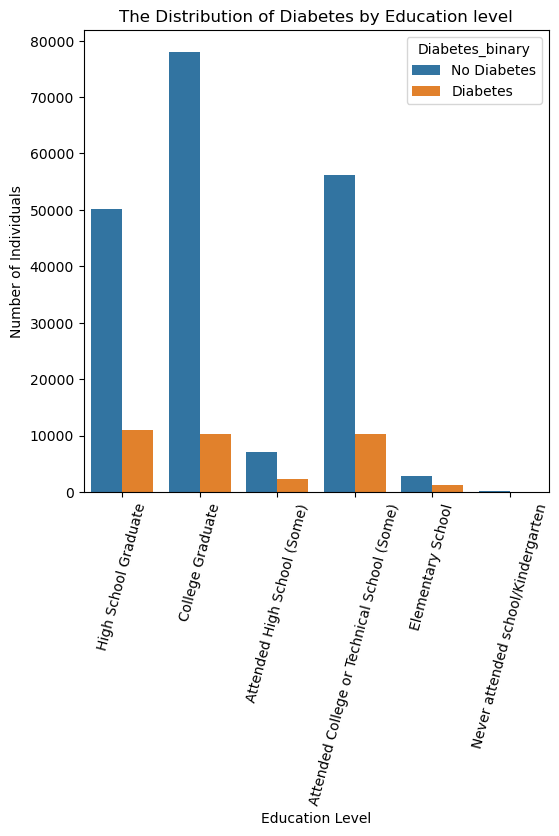

In [59]:
plt.figure(figsize=(6,6))
sns.countplot(x='Education', hue="Diabetes_binary", data=df_2) 
plt.xticks(rotation=75)  
plt.title("The Distribution of Diabetes by Education level")
plt.ylabel("Number of Individuals")
plt.xlabel("Education Level")

In [60]:
df_2.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_binary'],
      dtype='object')

Text(0.5, 0, 'Presence of Cholesterol')

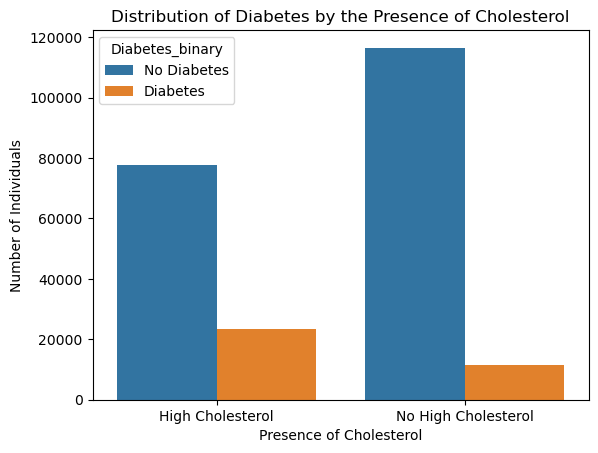

In [61]:
sns.countplot(x='HighChol', hue="Diabetes_binary", data=df_2) 
plt.title("Distribution of Diabetes by the Presence of Cholesterol")
plt.ylabel("Number of Individuals")
plt.xlabel("Presence of Cholesterol")

## What is the mean proportion of High Cholesterol in relation to individuals with Diabetes?

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

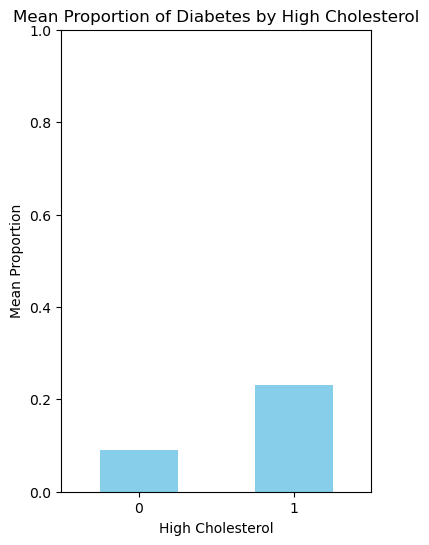

In [62]:

mean_counts = df.groupby('HighChol')['Diabetes_binary'].mean()
mean_counts

plt.figure(figsize=(4, 6))
mean_counts.plot(kind='bar', color='skyblue')
plt.xlabel('High Cholesterol')
plt.ylabel('Mean Proportion')
plt.title('Mean Proportion of Diabetes by High Cholesterol')
plt.ylim(0, 1)  # Set the y-axis limits (0 to 1 for proportions)
plt.xticks(rotation=0)  

## What is the frequency count of the number of people consuming veggies and having diabetes? 

Text(0.5, 1.0, 'The Distribution of Individuals that consume Veggies ')

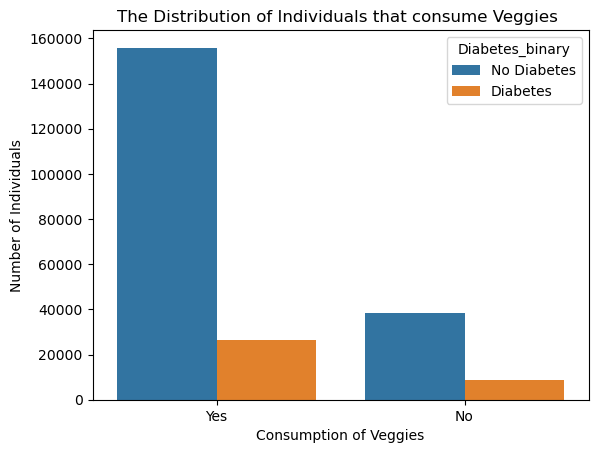

In [63]:
sns.countplot(x='Veggies', hue="Diabetes_binary", data=df_2) 
#plt.xticks(rotation=75)  #
plt.ylabel("Number of Individuals")
plt.xlabel("Consumption of Veggies")
plt.title("The Distribution of Individuals that consume Veggies ")

## What variables are correlated to consuming veggies?

In [64]:
data = df[['Veggies', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
           'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'HvyAlcoholConsump',
           'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth',
           'DiffWalk', 'Age', 'Education', 'Income', 'Diabetes_binary']]

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Extract the row corresponding to 'Veggies'
correlation_with_veggies = correlation_matrix.loc['Veggies']

# Print the table of correlation coefficients
print(correlation_with_veggies)

Veggies                 1.000000
HighBP                 -0.042994
HighChol               -0.027399
CholCheck              -0.000653
BMI                    -0.044054
Smoker                 -0.013744
Stroke                 -0.033029
HeartDiseaseorAttack   -0.027180
PhysActivity            0.135240
Fruits                  0.242941
HvyAlcoholConsump       0.029772
AnyHealthcare           0.020530
NoDocbcCost            -0.019876
GenHlth                -0.094115
MentHlth               -0.042215
PhysHlth               -0.045130
DiffWalk               -0.063189
Age                    -0.003856
Education               0.131624
Income                  0.125068
Diabetes_binary        -0.041734
Name: Veggies, dtype: float64


## What are the top 5 and bottom 5 correlations with veggies?

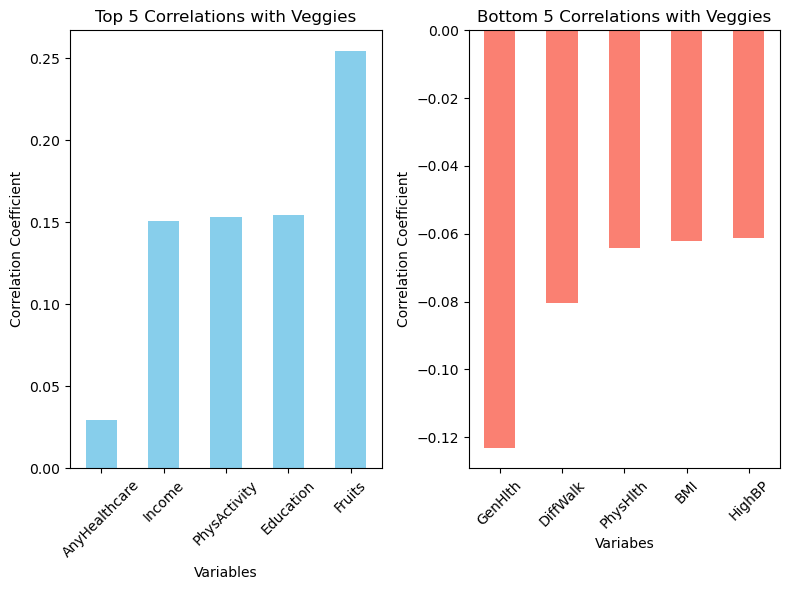

In [65]:
correlation_data = pd.Series({
    'HighBP': -0.061266,
    'HighChol': -0.039874,
    'CholCheck': 0.006121,
    'BMI': -0.062275,
    'Smoker': -0.030678,
    'Stroke': -0.041124,
    'HeartDiseaseorAttack': -0.039167,
    'PhysActivity': 0.153150,
    'Fruits': 0.254342,
    'HvyAlcoholConsump': 0.021064,
    'AnyHealthcare': 0.029584,
    'NoDocbcCost': -0.032232,
    'GenHlth': -0.123066,
    'MentHlth': -0.058884,
    'PhysHlth': -0.064290,
    'DiffWalk': -0.080506,
    'Age': -0.009771,
    'Education': 0.154329,
    'Income': 0.151087,
    'Diabetes_binary': -0.056584
})


sorted_correlations = correlation_data.sort_values()


top_5_correlations = sorted_correlations[-5:] # Top 5 correlations
bottom_5_correlations = sorted_correlations[:5] # Bottom 5 correlations


plt.figure(figsize=(8, 6))

# Top 5 correlations
plt.subplot(1, 2, 1)
top_5_correlations.plot(kind='bar', color='skyblue')
plt.title('Top 5 Correlations with Veggies')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)

# Bottom 5 correlations
plt.subplot(1, 2, 2)
bottom_5_correlations.plot(kind='bar', color='salmon')
plt.title('Bottom 5 Correlations with Veggies')
plt.xlabel('Variabes')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Do people who consume veggies engage in more physically activity?

Text(0.5, 1.0, 'The Count of Individuals that are Physical Active and Consume Veggies')

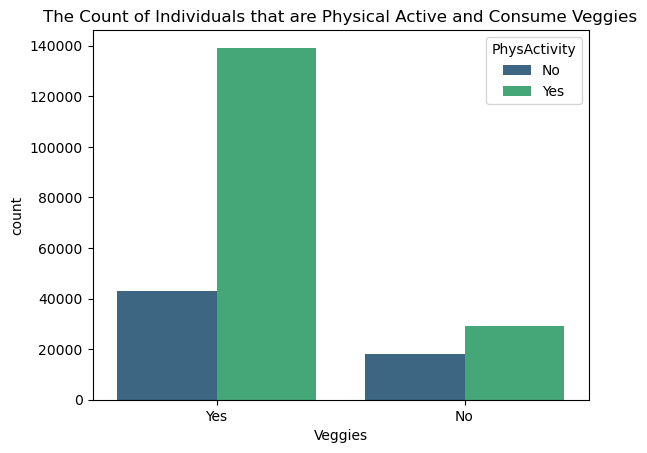

In [66]:
sns.countplot(x='Veggies', hue="PhysActivity", palette='viridis',data=df_2) 
#plt.xticks(rotation=75)  #
plt.title("The Count of Individuals that are Physical Active and Consume Veggies")

## Do people with Diabetes engage in more physical activity and consume more veggies?

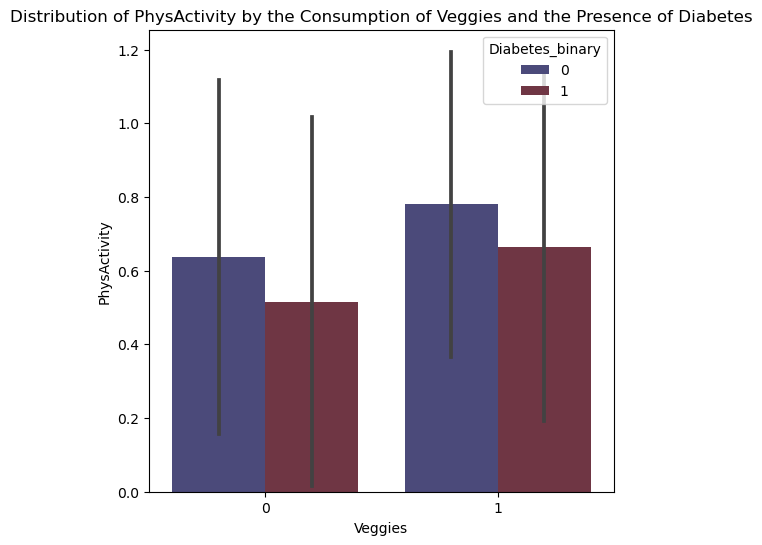

In [67]:
plt.figure(figsize=(6, 6))
sns.barplot(x='Veggies', y='PhysActivity', hue='Diabetes_binary', palette='icefire', data=df,ci='sd')
plt.xlabel('Veggies')
plt.ylabel('PhysActivity')
plt.title('Distribution of PhysActivity by the Consumption of Veggies and the Presence of Diabetes')


plt.legend(title='Diabetes_binary', loc='upper right')

plt.show()

In [68]:
df_2.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_binary'],
      dtype='object')

## How does income impact Mental Health?

Text(0.5, 0, 'Income Distribution')

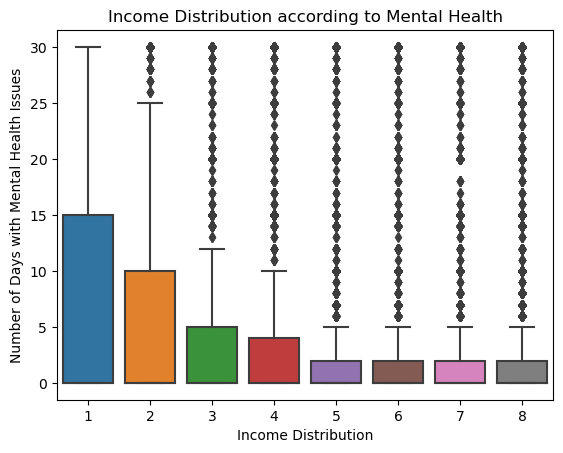

In [69]:
sns.boxplot(data=df, x="Income", y="MentHlth")
plt.title("Income Distribution according to Mental Health")
plt.ylabel("Number of Days with Mental Health Issues")
plt.xlabel("Income Distribution")

## How does Mental & General Health impact Diabetes? What is the relationship between both variables? Do they have potential to impact each other positively?

Text(0.5, 0, 'Overall General Health')

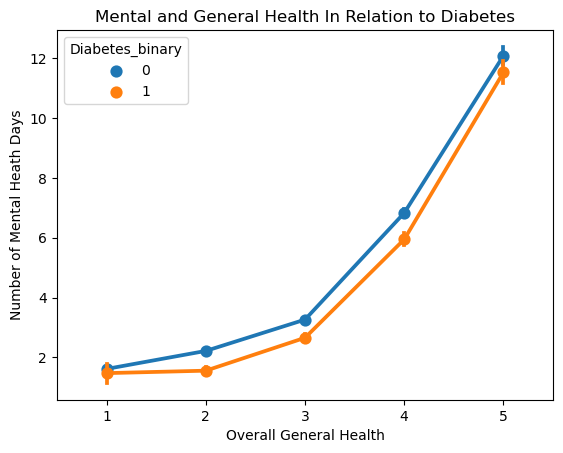

In [70]:
sns.pointplot(data=df, x='GenHlth', y='MentHlth',hue="Diabetes_binary")
plt.title("Mental and General Health In Relation to Diabetes")
plt.ylabel("Number of Mental Heath Days")
plt.xlabel("Overall General Health")

Text(0, 0.5, 'Number of individuals')

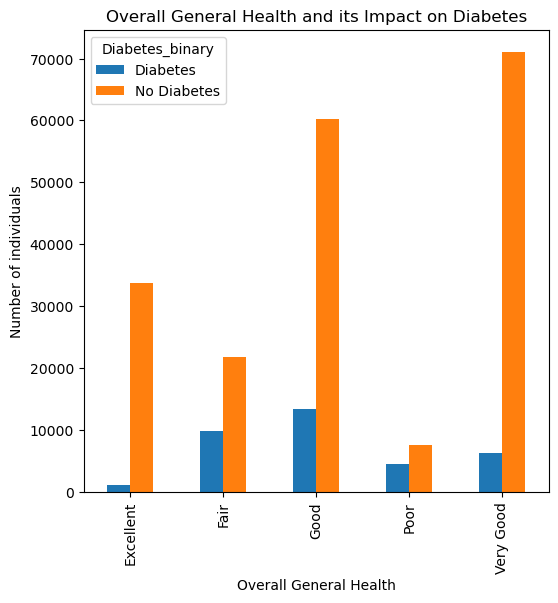

In [71]:
pd.crosstab(df_2.GenHlth,df_2.Diabetes_binary).plot(kind="bar",figsize=(6,6))
plt.title("Overall General Health and its Impact on Diabetes")
plt.xlabel("Overall General Health")
plt.ylabel("Number of individuals")

## Does a higher income signify greater mental health and lower diabetes?

Text(0, 0.5, 'Number of Mental Health Days')

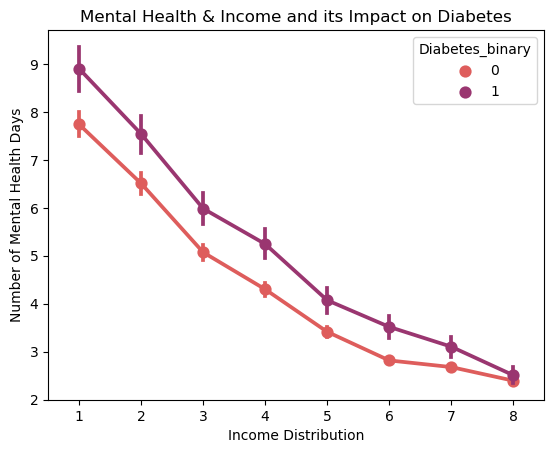

In [72]:
sns.pointplot(data=df, x='Income', y='MentHlth',hue="Diabetes_binary",palette='flare')
plt.title("Mental Health & Income and its Impact on Diabetes")
plt.xlabel("Income Distribution")
plt.ylabel("Number of Mental Health Days")

## How does age impact High Cholesterol and Diabetes?

Text(0, 0.5, 'Cholesterol Level')

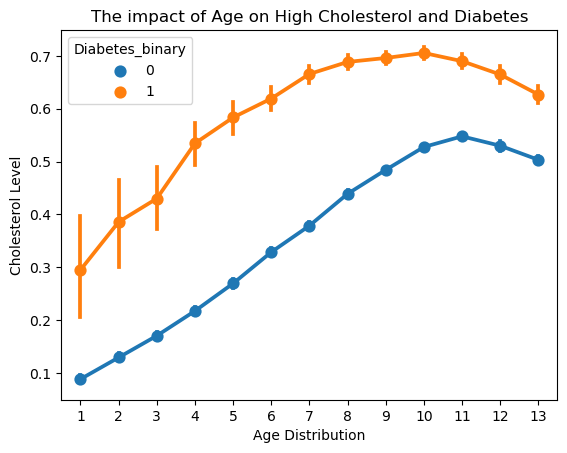

In [73]:
sns.pointplot(data=df, x='Age', y='HighChol',hue="Diabetes_binary")
plt.title("The impact of Age on High Cholesterol and Diabetes")
plt.xlabel("Age Distribution")
plt.ylabel("Cholesterol Level")

## How does Diabetes impact stroke and income earned over 75,000?

<AxesSubplot:xlabel='Income', ylabel='Stroke'>

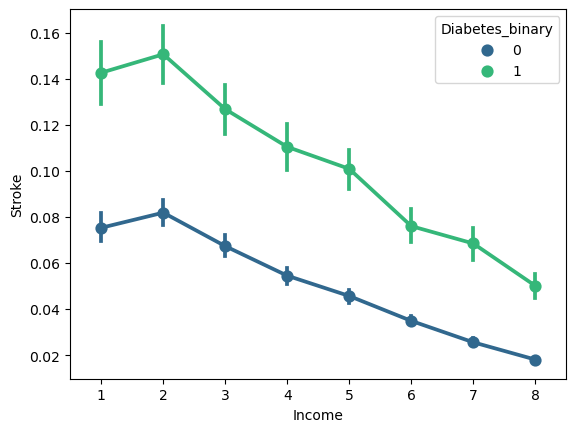

In [74]:
sns.pointplot(data=df, x='Income', y='Stroke',hue="Diabetes_binary",palette='viridis')

## How does Smoking impact Diabetes in relation to Income Earned over 35,000?

<AxesSubplot:xlabel='Income', ylabel='Smoker'>

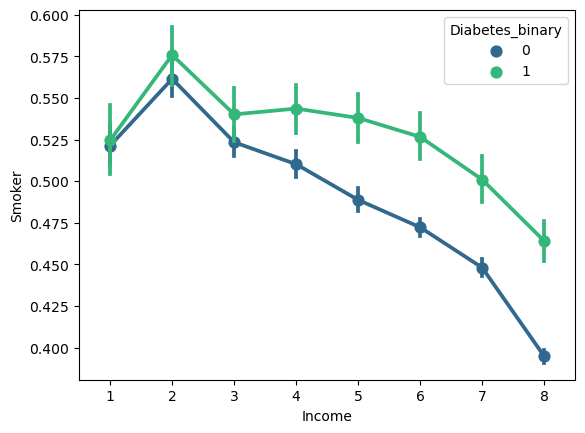

In [75]:
sns.pointplot(data=df, x='Income', y='Smoker',hue="Diabetes_binary",palette='viridis')

## Does attending High School impact smoking and Diabetes?

<AxesSubplot:xlabel='Education', ylabel='Smoker'>

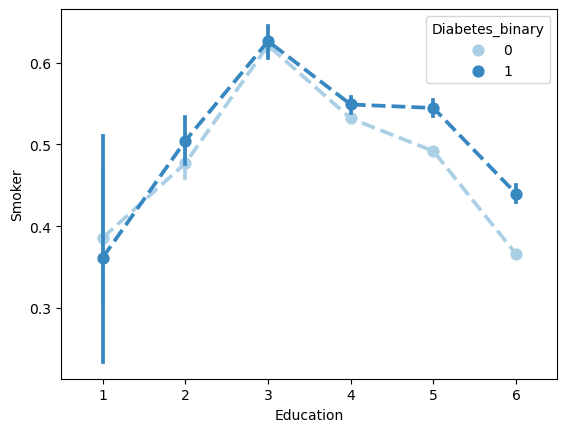

In [76]:
sns.pointplot(data=df, x='Education', y='Smoker',hue="Diabetes_binary",palette='Blues',linestyles='--')

## What is the distribution of data for alcohol consumption and smoking and its impact on Stroke?

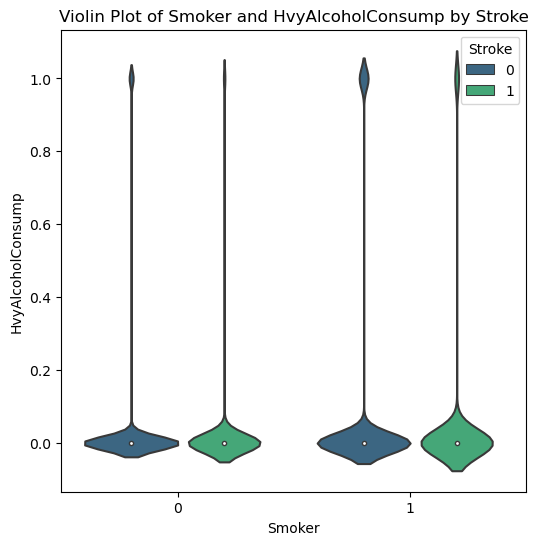

In [77]:
plt.figure(figsize=(6, 6))
sns.violinplot(data=df, x="Smoker", y="HvyAlcoholConsump", hue="Stroke", palette="viridis")
plt.xlabel("Smoker")
plt.ylabel("HvyAlcoholConsump")
plt.title("Violin Plot of Smoker and HvyAlcoholConsump by Stroke")


# Customize the legend
plt.legend(title="Stroke", loc="upper right")

plt.show()

## Does having a higher blood pressure relate to less physical activity?

In [78]:
df_2.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_binary'],
      dtype='object')

Text(0.5, 0, 'Blood Pressure')

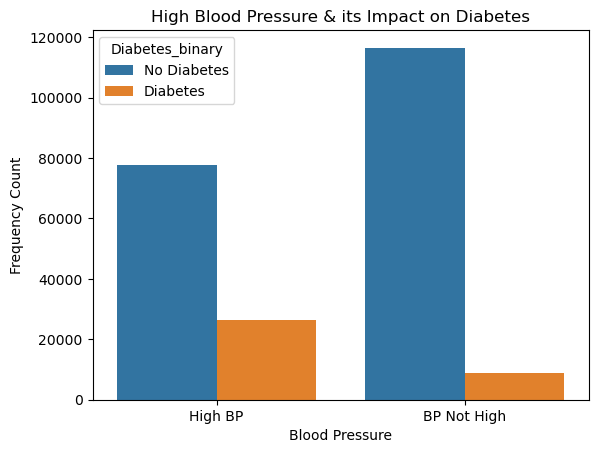

In [79]:
sns.countplot(x='HighBP', hue="Diabetes_binary", data=df_2) 
#plt.xticks(rotation=75)  #
plt.title("High Blood Pressure & its Impact on Diabetes")
plt.ylabel("Frequency Count")
plt.xlabel("Blood Pressure")

## What is the distribution of income for individuals with diabetes?

<AxesSubplot:xlabel='Diabetes_binary', ylabel='count'>

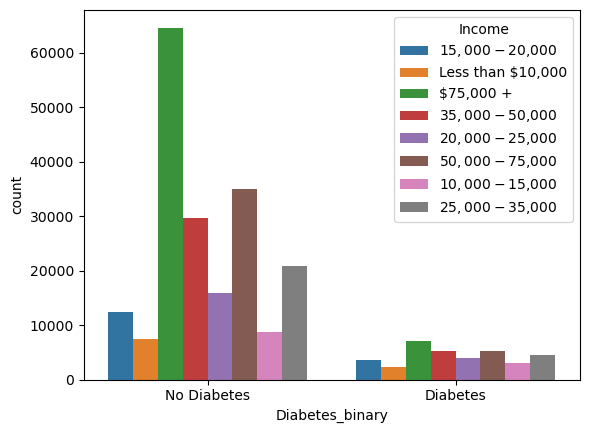

In [80]:
sns.countplot(x='Diabetes_binary', hue="Income", data=df_2) 
#plt.xticks(rotation=75)  #

## Does a college graduate have a greater risk of developing diabetes?

<AxesSubplot:xlabel='Diabetes_binary', ylabel='count'>

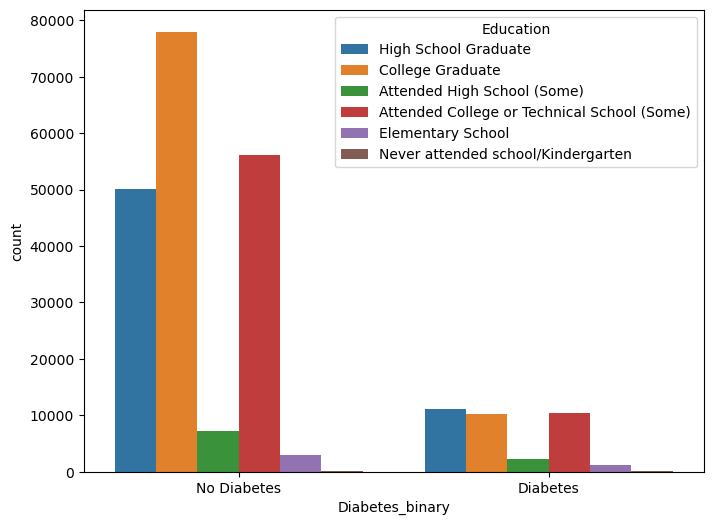

In [81]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes_binary', hue="Education", data=df_2) 
#plt.xticks(rotation=75)  #

# What is the highest age group surveyed?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '60-64'),
  Text(1, 0, '65-69'),
  Text(2, 0, '55-59'),
  Text(3, 0, '50-54'),
  Text(4, 0, '70-74'),
  Text(5, 0, '45-49'),
  Text(6, 0, '80 or older'),
  Text(7, 0, '75-79'),
  Text(8, 0, '40-44'),
  Text(9, 0, '35-39'),
  Text(10, 0, '30-34'),
  Text(11, 0, '25-29'),
  Text(12, 0, '18-24')])

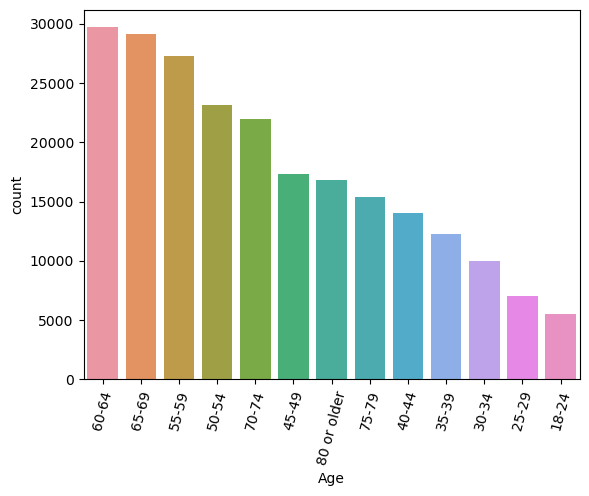

In [82]:
sns.countplot(data=df_2, x='Age', order=df_2['Age'].value_counts().index)
plt.xticks(rotation=75)  #

In [83]:
df.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_binary'],
      dtype='object')

## HeatMap & Correlation Matrix Showing the impact of Diabetes on Relevant Features

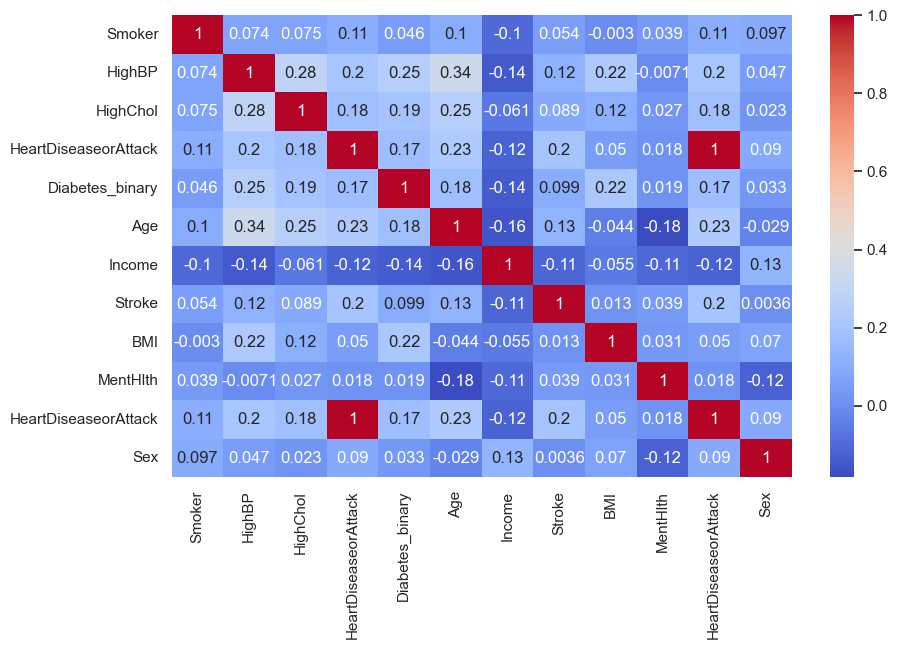

In [84]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
data = df[['Smoker', 'HighBP', 'HighChol', 'HeartDiseaseorAttack', 'Diabetes_binary','Age','Income','Stroke','BMI','MentHlth','HeartDiseaseorAttack','Sex']]
heatmap_data = data.corr(method="spearman")
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm")
plt.show()

## How does smoking impact diabetes?

Text(0.5, 0, 'Diabetes Binary')

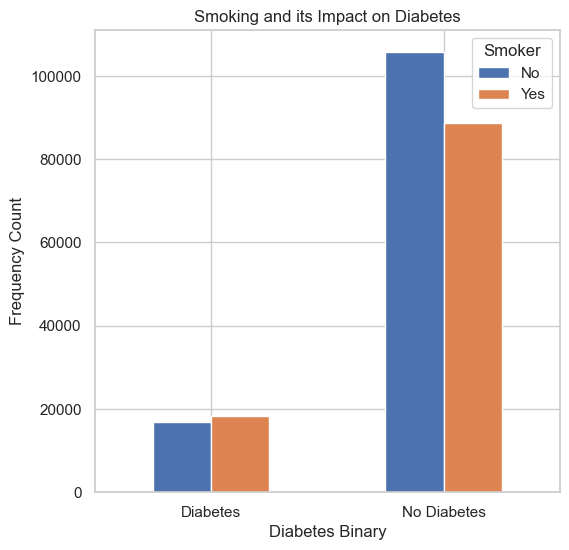

In [85]:
data = df_2[['Smoker', 'HighBP', 'HighChol', 'HeartDiseaseorAttack', 'Diabetes_binary']]

# Create a contingency matrix (cross-tabulation) of the relationships
contingency_matrix = pd.crosstab(data['Diabetes_binary'], data['Smoker'])
contingency_matrix
# Set up the circular layout
#cir.circlize(contingency_matrix, cell_labels=True, cell_label_format="%d", title="Chord Diagram")
contingency_matrix.plot(kind='bar', stacked=False, figsize=(6, 6))
plt.xticks(rotation=0)  #
plt.title("Smoking and its Impact on Diabetes")
plt.ylabel("Frequency Count")
plt.xlabel("Diabetes Binary")

## What age group is most at risk for developing Diabetes?

Text(0, 0.5, 'Number of Individuals')

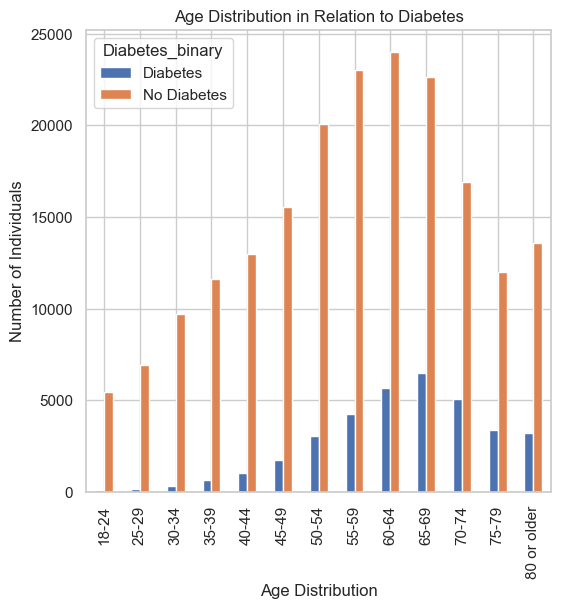

In [86]:
pd.crosstab(df_2.Age,df_2.Diabetes_binary).plot(kind="bar",figsize=(6,6))
plt.title("Age Distribution in Relation to Diabetes")
plt.xlabel("Age Distribution")
plt.ylabel("Number of Individuals")

In [87]:
df_2.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_binary'],
      dtype='object')

## How does Income impact Heavy Alcohol Drinking?

<AxesSubplot:xlabel='HvyAlcoholConsump'>

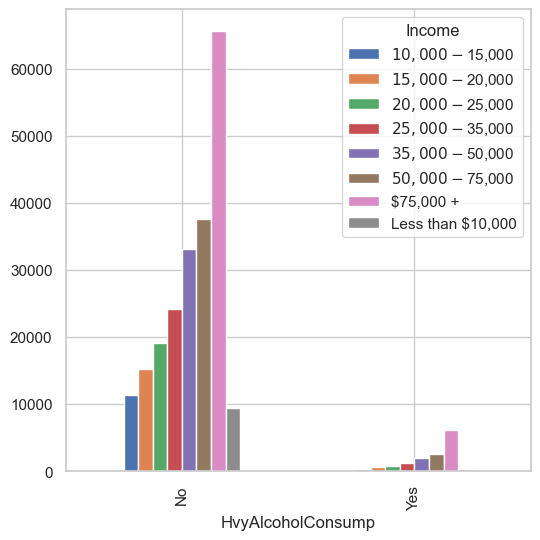

In [88]:
pd.crosstab(df_2.HvyAlcoholConsump,df_2.Income).plot(kind="bar",figsize=(6,6))

In [89]:
# cross_table = pd.crosstab(df_2.'HvyAlcoholConsump', [df_2['Income'], df_2['Diabetes_binary']])

# # Create a bar plot with 'Income' and 'Diabetes_binary' as hue
# plt.figure(figsize=(10, 6))
# sns.barplot(data=cross_table, x='Income', y=cross_table.index, hue='Diabetes_binary', palette='viridis')
# plt.xlabel('Income')
# plt.ylabel('Count')
# plt.title('Bar Plot of Income by HvyAlcoholConsump with Diabetes_binary')

# # Customize the legend
# plt.legend(title='Diabetes_binary', loc='upper right')

# plt.show()

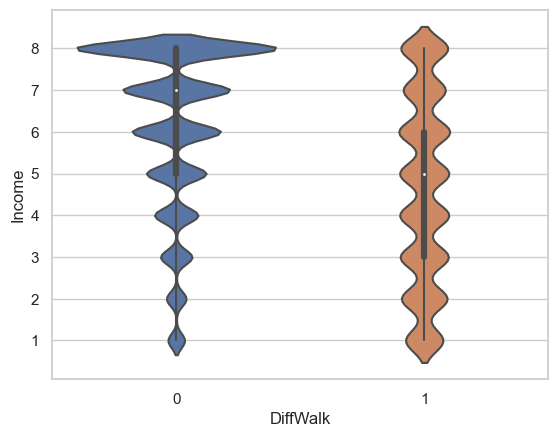

In [90]:
sns.violinplot(x='DiffWalk', y='Income', data=df)

# Show the plot
plt.show()

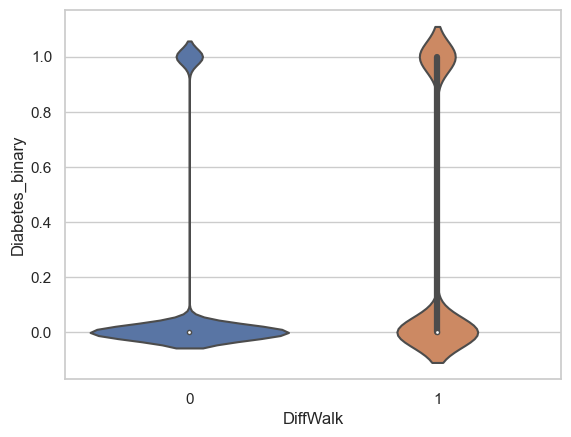

In [91]:
sns.violinplot(x='DiffWalk', y='Diabetes_binary', data=df)

# Show the plot
plt.show()

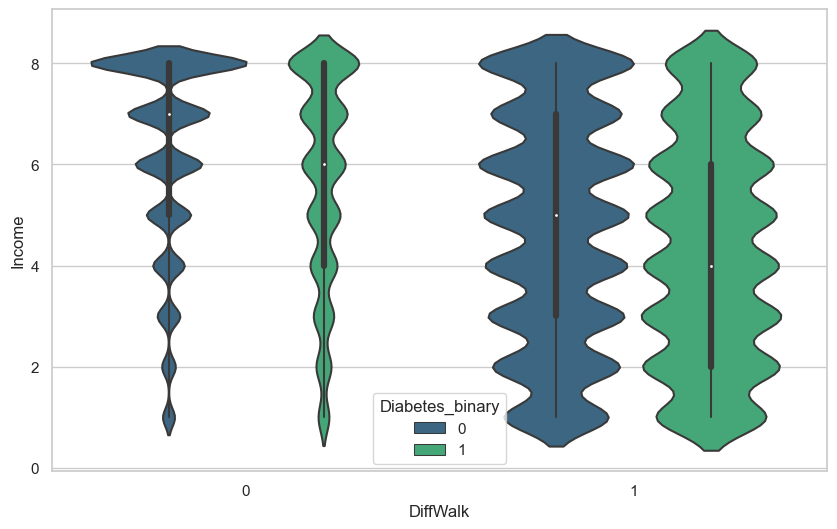

In [92]:
plt.figure(figsize=(10,6))
sns.violinplot(x='DiffWalk', y="Income", hue="Diabetes_binary", data=df,palette='viridis')

# Show the plot
plt.show()

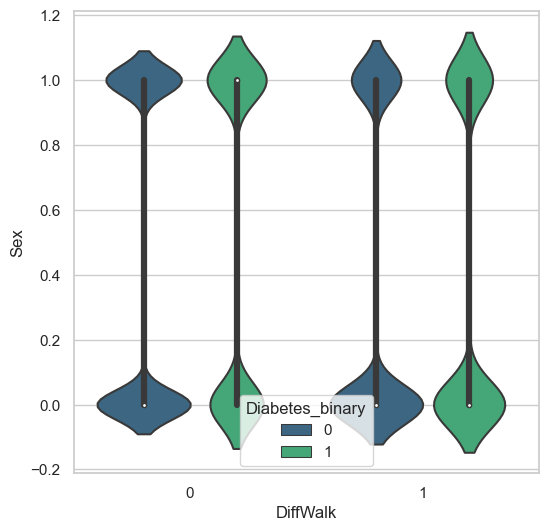

In [93]:
plt.figure(figsize=(6,6))
sns.violinplot(x='DiffWalk', y='Sex', hue='Diabetes_binary', data=df,palette='viridis')

# Show the plot
plt.show()

In [94]:
df.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_binary'],
      dtype='object')

In [95]:
#sns.barplot(df, x="HighBP", y="Income", hue="Diabetes_binary", legend=False)

## How does Diabetes impact Difficulty Walking? How does it vary across Genders?

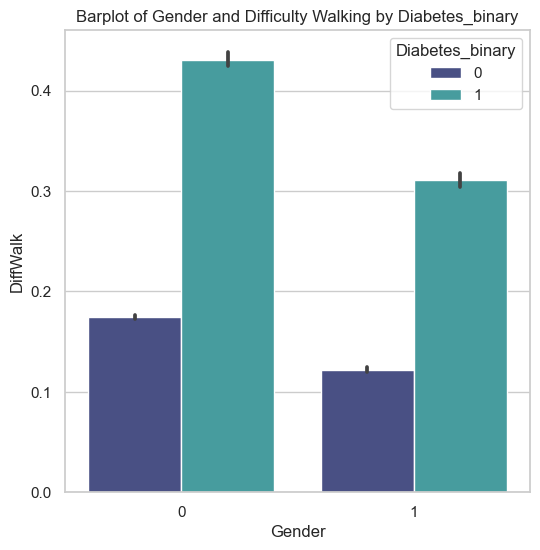

In [96]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df, x="Sex", y="DiffWalk", hue="Diabetes_binary", palette='mako')
plt.xlabel("Gender")
plt.ylabel("DiffWalk")
plt.title("Barplot of Gender and Difficulty Walking by Diabetes_binary")

# Customize the legend
plt.legend(title="Diabetes_binary", loc="upper right")

plt.show()

## How does higher income and education impact Diabetes?

Text(0.5, 1.0, 'The Distribution of Income and Education by Diabetes')

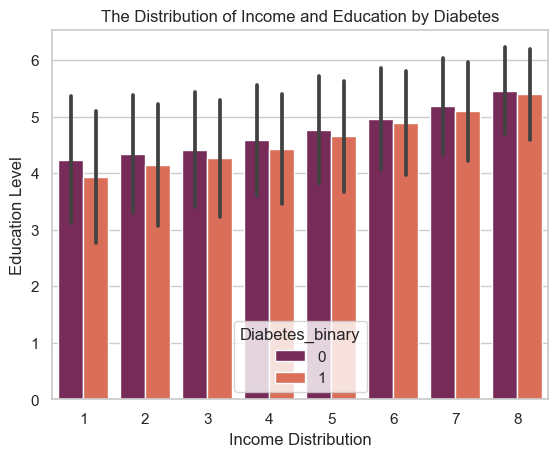

In [97]:
sns.barplot(data=df, x="Income", y="Education", hue="Diabetes_binary", palette='rocket', ci='sd')
plt.xlabel("Income Distribution")
plt.ylabel("Education Level")
plt.title("The Distribution of Income and Education by Diabetes")


## How does increase in alcohol consumption impact Diabetes? How does it vary by Education level?

(0.5, 7.0)

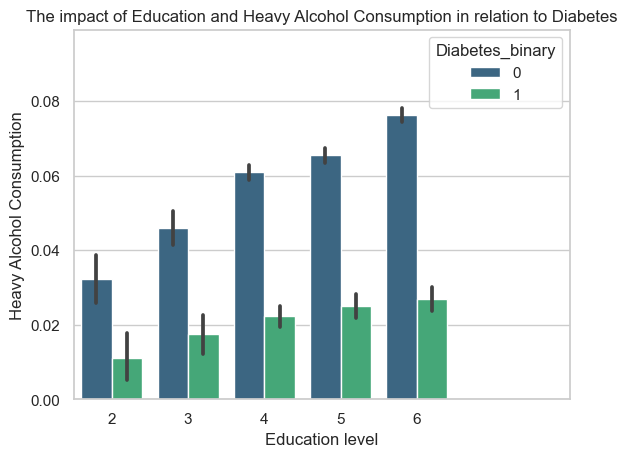

In [98]:
sns.barplot(data=df, x="Education", y="HvyAlcoholConsump", hue="Diabetes_binary", palette='viridis')
plt.title("The impact of Education and Heavy Alcohol Consumption in relation to Diabetes")
plt.xlabel("Education level")
plt.ylabel("Heavy Alcohol Consumption")
plt.xlim(0.5,7)

## Does consuming fruits & alcohol impact Diabetes?

<AxesSubplot:xlabel='Fruits', ylabel='HvyAlcoholConsump'>

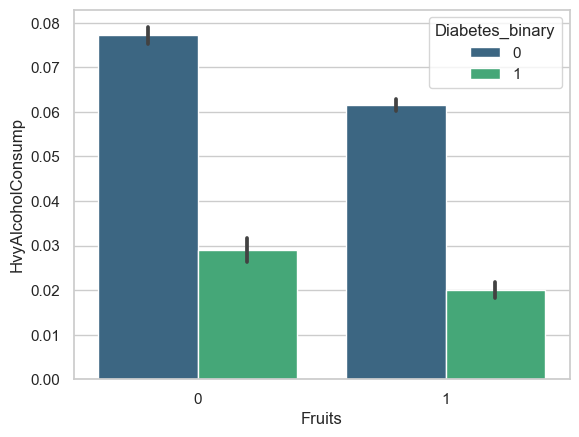

In [99]:
sns.barplot(data=df, x="Fruits", y="HvyAlcoholConsump", hue="Diabetes_binary", palette='viridis')

## Does a person with an income of 25,00 consume more alcohol than a person with an income of 35,000?

(array([1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(1, 0, '$10,000 - $15,000'),
  Text(2, 0, '$15,000 - $20,000'),
  Text(3, 0, '$20,000 - $25,000'),
  Text(4, 0, '$25,000 - $35,000'),
  Text(5, 0, '$35,000 - $50,000'),
  Text(6, 0, '$50,000 - $75,000'),
  Text(7, 0, '$75,000 +'),
  Text(8, 0, 'Less than $10,000')])

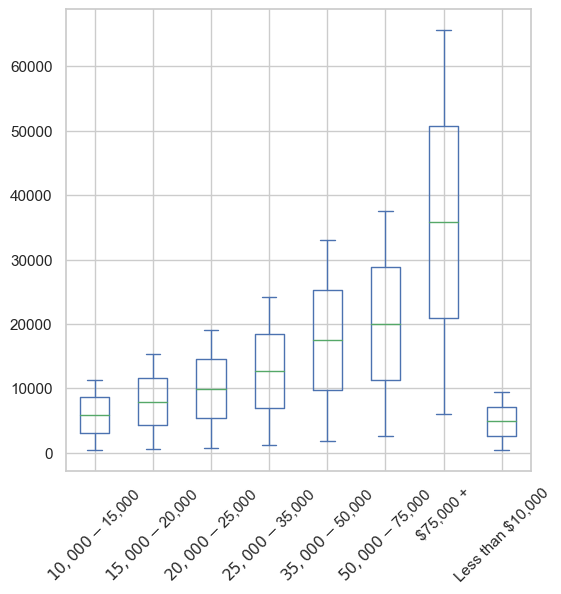

In [100]:
pd.crosstab(df_2.HvyAlcoholConsump,df_2.Income).plot(kind="box",figsize=(6,6))
plt.xticks(rotation=45)

## In which age bracket do we find the highest earners?

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(1, 0, '18-24'),
  Text(2, 0, '25-29'),
  Text(3, 0, '30-34'),
  Text(4, 0, '35-39'),
  Text(5, 0, '40-44'),
  Text(6, 0, '45-49'),
  Text(7, 0, '50-54'),
  Text(8, 0, '55-59'),
  Text(9, 0, '60-64'),
  Text(10, 0, '65-69'),
  Text(11, 0, '70-74'),
  Text(12, 0, '75-79'),
  Text(13, 0, '80 or older')])

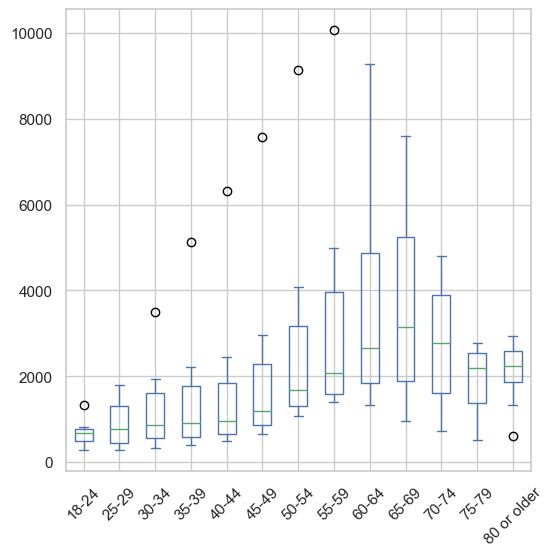

In [101]:
pd.crosstab(df_2.Income,df_2.Age).plot(kind="box",figsize=(6,6))
plt.xticks(rotation=45)

In [102]:
df_2.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_binary'],
      dtype='object')

## What is the age distribution of individuals that have access to healthcare?

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(1, 0, '18-24'),
  Text(2, 0, '25-29'),
  Text(3, 0, '30-34'),
  Text(4, 0, '35-39'),
  Text(5, 0, '40-44'),
  Text(6, 0, '45-49'),
  Text(7, 0, '50-54'),
  Text(8, 0, '55-59'),
  Text(9, 0, '60-64'),
  Text(10, 0, '65-69'),
  Text(11, 0, '70-74'),
  Text(12, 0, '75-79'),
  Text(13, 0, '80 or older')])

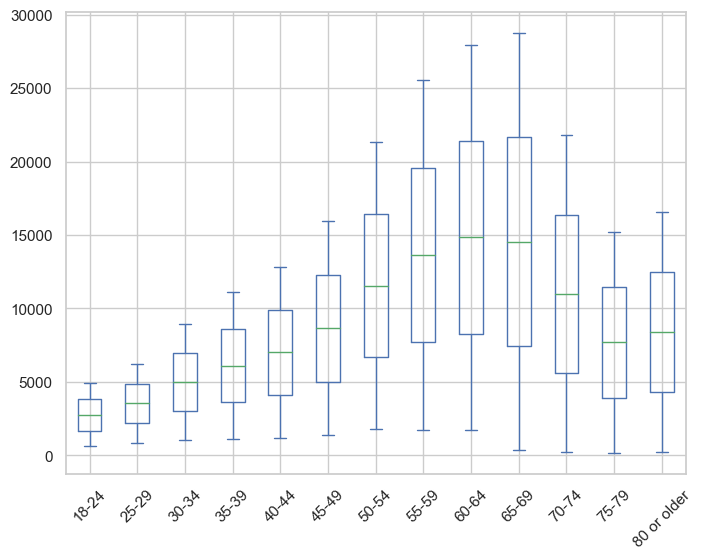

In [103]:
pd.crosstab(df_2.AnyHealthcare,df_2.Age).plot(kind="box",figsize=(8,6))
plt.xticks(rotation=45)

## There are more individuals with diabetes who are 70 years old when compared to individuals who are 60 years old?

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(1, 0, '18-24'),
  Text(2, 0, '25-29'),
  Text(3, 0, '30-34'),
  Text(4, 0, '35-39'),
  Text(5, 0, '40-44'),
  Text(6, 0, '45-49'),
  Text(7, 0, '50-54'),
  Text(8, 0, '55-59'),
  Text(9, 0, '60-64'),
  Text(10, 0, '65-69'),
  Text(11, 0, '70-74'),
  Text(12, 0, '75-79'),
  Text(13, 0, '80 or older')])

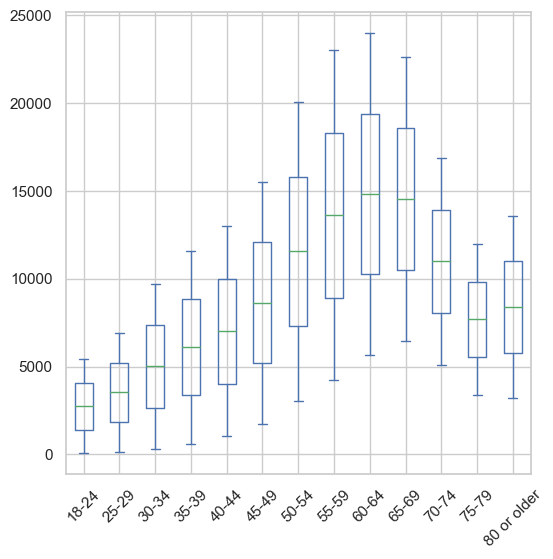

In [104]:
pd.crosstab(df_2.Diabetes_binary,df_2.Age).plot(kind="box",figsize=(6,6))
plt.xticks(rotation=45)

(array([1, 2]), [Text(1, 0, 'No'), Text(2, 0, 'Yes')])

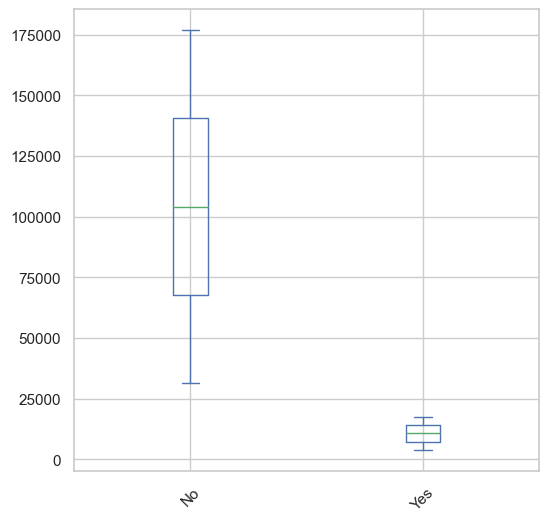

In [105]:
pd.crosstab(df_2.Diabetes_binary,df_2.NoDocbcCost).plot(kind="box",figsize=(6,6))
plt.xticks(rotation=45)

(array([1, 2]), [Text(1, 0, 'No'), Text(2, 0, 'Yes')])

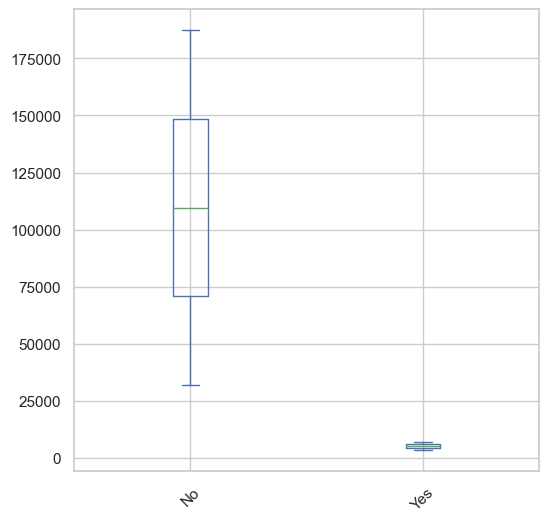

In [106]:
pd.crosstab(df_2.Diabetes_binary,df_2.Stroke).plot(kind="box",figsize=(6,6))
plt.xticks(rotation=45)

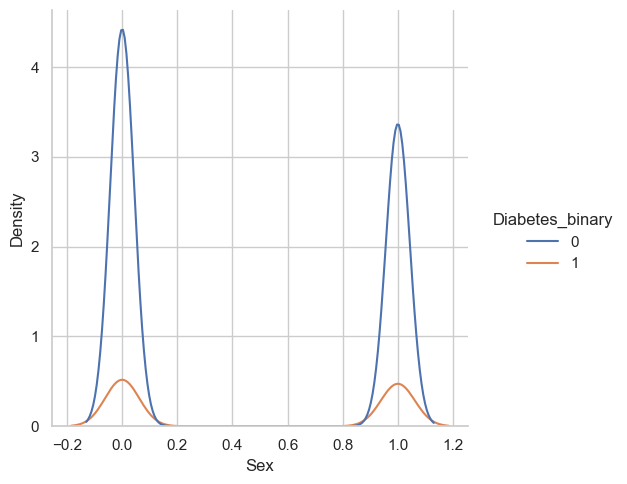

In [107]:
sns.displot(data=df, x="Sex",hue="Diabetes_binary", kind="kde")


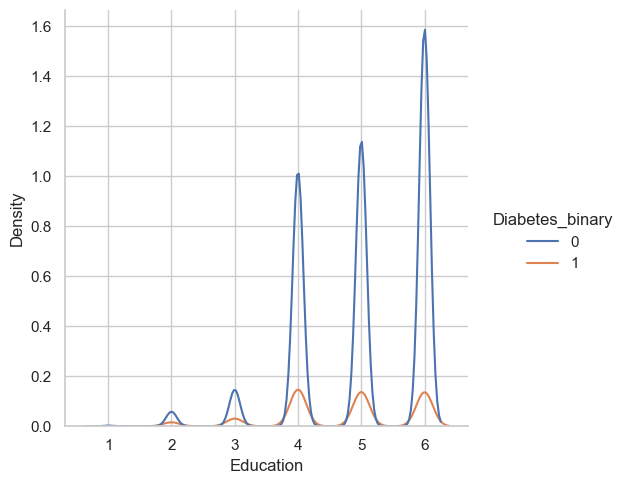

In [108]:
sns.displot(data=df, x="Education", hue="Diabetes_binary", kind="kde")

In [109]:
df.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_binary'],
      dtype='object')

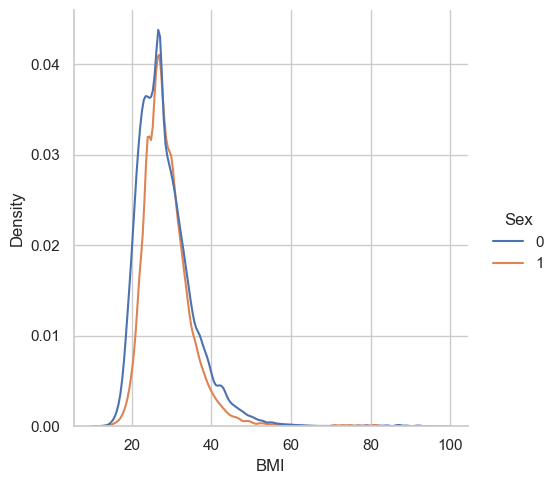

In [110]:
sns.displot(data=df, x="BMI",hue="Sex", kind="kde")

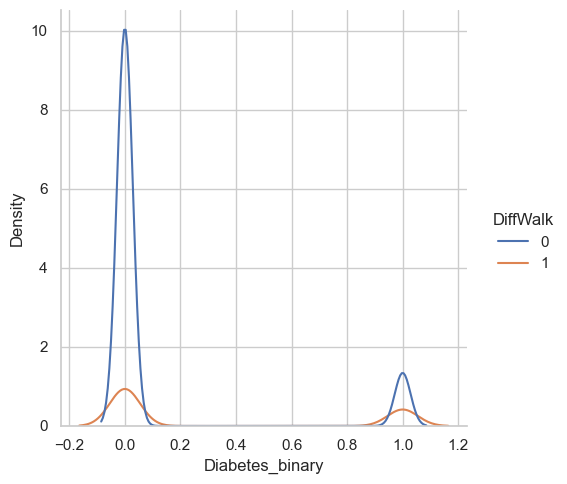

In [111]:
sns.displot(data=df, x="Diabetes_binary",hue="DiffWalk", kind="kde")

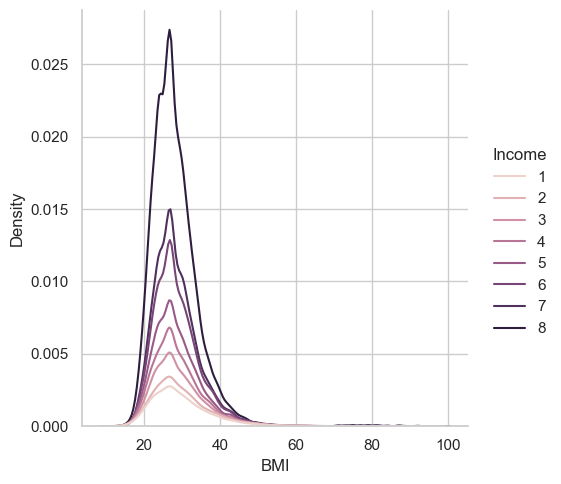

In [112]:
sns.displot(data=df, x="BMI",hue="Income", kind="kde")

## How does BMI differ between Diabetes and No Diabetes?

C:\Users\nitin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nitin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 60.0)

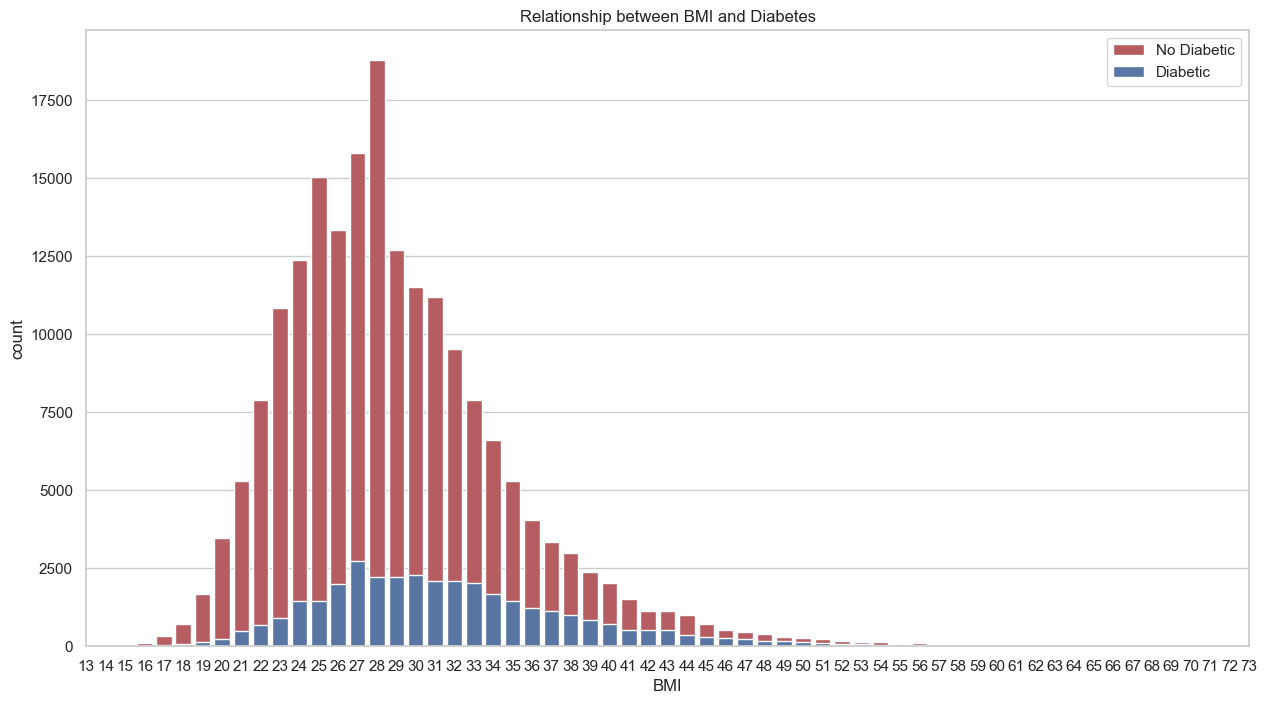

In [113]:

plt.figure(figsize=(15, 8))

sns.countplot(df.BMI[df.Diabetes_binary == 0], color="r", label="No Diabetic")
sns.countplot(df.BMI[df.Diabetes_binary == 1], color="b", label="Diabetic")
plt.title("Relationship between BMI and Diabetes")

plt.legend()
plt.xlim(0,60)

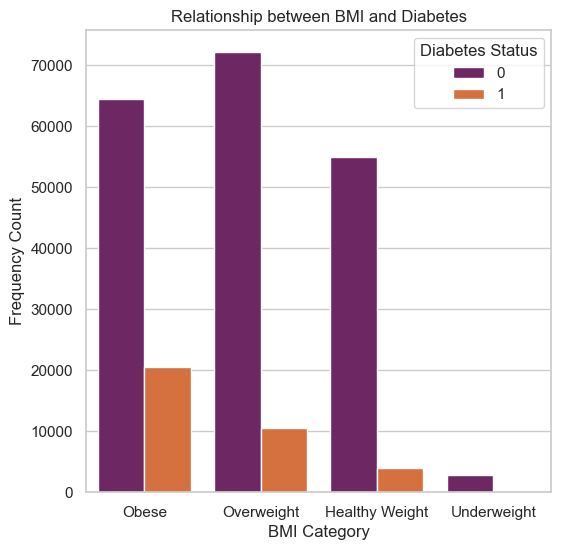

In [114]:
def categorize_bmi(bmi):
    
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi <= 24.9:
        return "Healthy Weight"
    elif 25 <= bmi <= 29.9:
        return "Overweight"
    else:
        return "Obese"
   

df['BMI_Category'] = df['BMI'].apply(categorize_bmi)

plt.figure(figsize=(6, 6))
colors = {"No Diabetic": "r", "Diabetic": "b"}
# Use the 'hue' parameter to differentiate by 'Diabetes_binary' and 'BMI_Category'
sns.countplot(data=df, x='BMI_Category', hue='Diabetes_binary', palette='inferno')

plt.title("Relationship between BMI and Diabetes")
plt.xlabel("BMI Category")
plt.ylabel("Frequency Count")

plt.legend(title='Diabetes Status')

plt.show()

In [115]:
df.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_binary', 'BMI_Category'],
      dtype='object')

In [116]:
df.drop('BMI_Category', axis=1, inplace=True)

In [117]:
df.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_binary'],
      dtype='object')

In [118]:
correlation_matrix = df.corr()


diabetes_correlations = correlation_matrix['Diabetes_binary'].drop('Diabetes_binary')

# Sort the correlations in descending order to find the top correlated variables
top_correlations = diabetes_correlations.abs().sort_values(ascending=False)

print(top_correlations)

GenHlth                 0.276940
HighBP                  0.254318
DiffWalk                0.205302
BMI                     0.205086
HighChol                0.194944
Age                     0.177263
HeartDiseaseorAttack    0.168213
PhysHlth                0.156211
Income                  0.140659
Education               0.102686
PhysActivity            0.100404
Stroke                  0.099193
CholCheck               0.072523
HvyAlcoholConsump       0.065950
MentHlth                0.054153
Smoker                  0.045504
Veggies                 0.041734
Sex                     0.032724
AnyHealthcare           0.025331
Fruits                  0.024805
NoDocbcCost             0.020048
Name: Diabetes_binary, dtype: float64


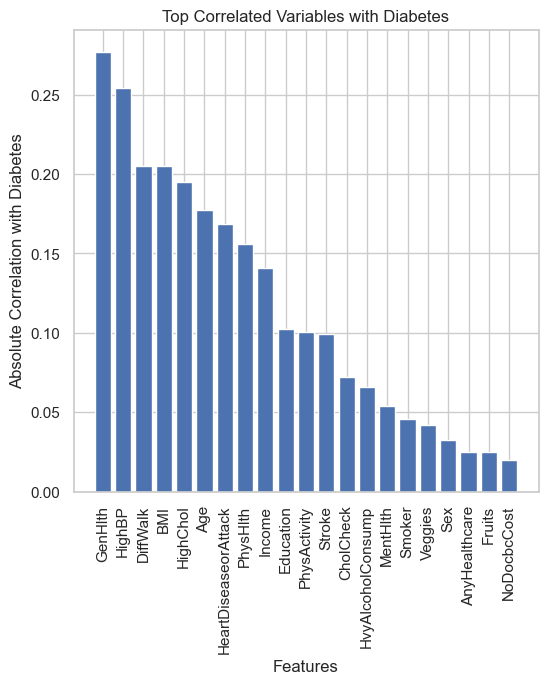

In [119]:

# Plot top correlated variables
plt.figure(figsize=(6, 6))
plt.bar(top_correlations.index, top_correlations)
plt.xlabel('Features')
plt.ylabel('Absolute Correlation with Diabetes')
plt.title('Top Correlated Variables with Diabetes')
plt.xticks(rotation=90)
plt.show()

In [120]:
df.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_binary'],
      dtype='object')

In [121]:
X=df[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']]
y=df['Diabetes_binary']

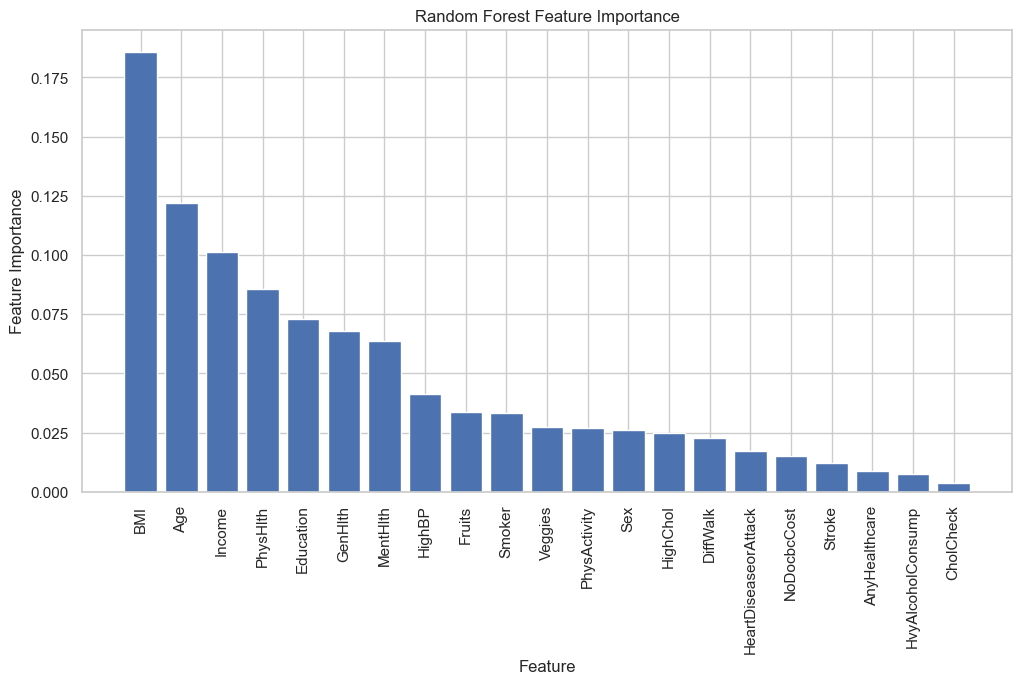

In [122]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X, y)

feature_importance = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=90)
plt.show()


In [123]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(score_func=chi2, k=15)  
X_new = selector.fit_transform(X, y)

selected_feature_indices = selector.get_support(indices=True)

selected_features = [X.columns[i] for i in selected_feature_indices]

print("Selected Features:", selected_features)



Selected Features: ['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income']


In [124]:
df_scores = pd.DataFrame(selector.scores_)
df_columns = pd.DataFrame(X.columns)

#concatenating two dataframes for better visualization
f_Scores = pd.concat([df_columns,df_scores],axis=1)               # feature scores
f_Scores.columns = ['Feature','Score']

sorted_feature_scores = f_Scores.sort_values(by='Score', ascending=False)
sorted_feature_scores

Feature         Score
15              PhysHlth  97988.761672
3                    BMI  15507.736174
14              MentHlth  11419.584750
18                   Age   8539.906340
0                 HighBP   8098.548237
16              DiffWalk   7875.496177
13               GenHlth   7671.732832
6   HeartDiseaseorAttack   5822.145697
1               HighChol   4869.312739
20                Income   3377.099257
5                 Stroke   2156.678382
10     HvyAlcoholConsump    937.401148
7           PhysActivity    617.563886
19             Education    479.112939
4                 Smoker    253.826098
17                   Sex    137.837135
12           NoDocbcCost     83.662830
9                Veggies     82.098846
8                 Fruits     54.688897
2              CholCheck     48.904140
11         AnyHealthcare      7.949731

In [125]:
print(f_Scores.nlargest(16,'Score'))

                 Feature         Score
15              PhysHlth  97988.761672
3                    BMI  15507.736174
14              MentHlth  11419.584750
18                   Age   8539.906340
0                 HighBP   8098.548237
16              DiffWalk   7875.496177
13               GenHlth   7671.732832
6   HeartDiseaseorAttack   5822.145697
1               HighChol   4869.312739
20                Income   3377.099257
5                 Stroke   2156.678382
10     HvyAlcoholConsump    937.401148
7           PhysActivity    617.563886
19             Education    479.112939
4                 Smoker    253.826098
17                   Sex    137.837135


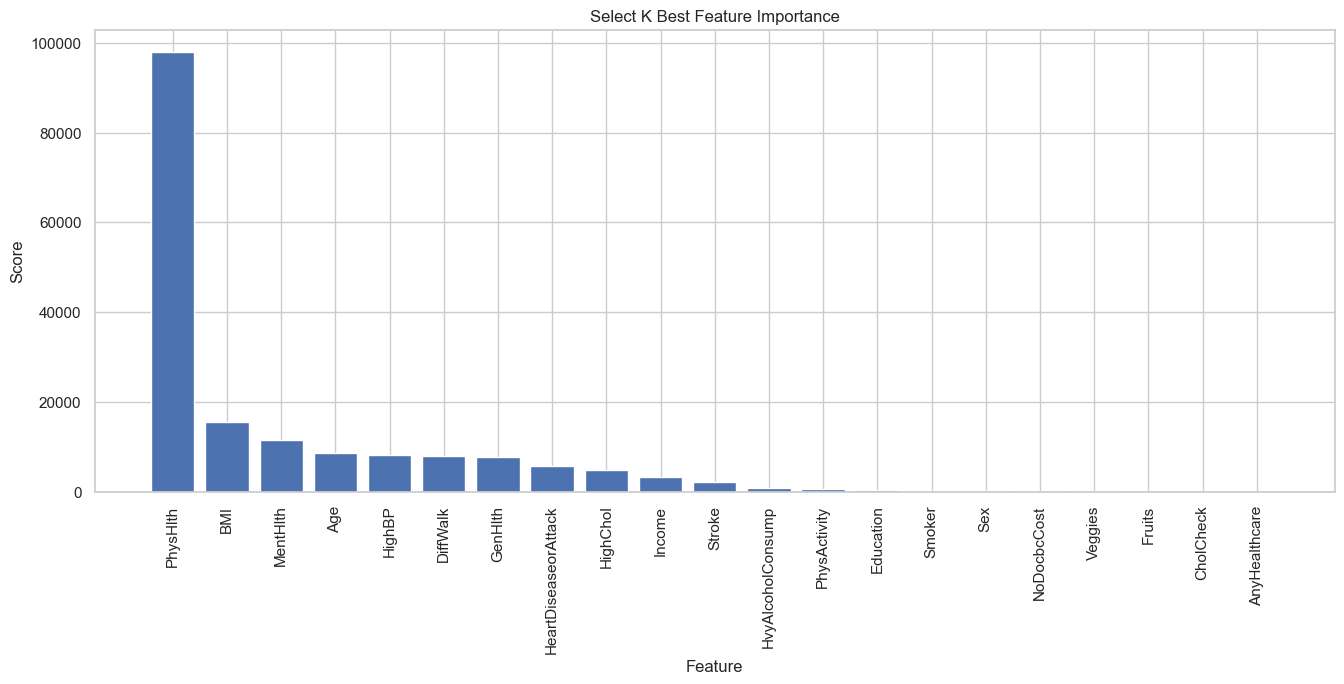

In [126]:
plt.figure(figsize=(16, 6))
plt.bar(sorted_feature_scores['Feature'], sorted_feature_scores['Score'])
plt.xlabel('Feature')
plt.ylabel('Score')
plt.title('Select K Best Feature Importance')
plt.xticks(rotation=90)
plt.show()


## We exclude NoDocbcCost, Veggies, Fruits, CholCheck, AnyHealthcare

In [130]:
df.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_binary'],
      dtype='object')

In [131]:
X=df[['HighBP', 'HighChol','BMI','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity','HvyAlcoholConsump','GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']]
y=df['Diabetes_binary']

In [132]:
X.shape, y.shape

((229474, 16), (229474,))

## Data is imbalanced

In [133]:
y.value_counts()

0    194377
1     35097
Name: Diabetes_binary, dtype: int64

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
from imblearn.under_sampling import NearMiss

# Define the NearMiss undersampler

nm = NearMiss(version=1, n_neighbors=15)

# Fit and transform your data to undersample the majority class
X_resampled, y_resampled = nm.fit_resample(X, y)

# Check the class distribution after undersampling
print("Class distribution after undersampling:")
print(y_resampled.value_counts())


Class distribution after undersampling:
0    35097
1    35097
Name: Diabetes_binary, dtype: int64


In [136]:
y_resampled.shape , X_resampled.shape

((70194,), (70194, 16))

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=100)

In [138]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train , y_train)

DecisionTreeClassifier()

In [139]:
y_pred=dt.predict(X_test)

In [140]:
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))
accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.79      0.83      0.81     10454
           1       0.82      0.79      0.80     10605

    accuracy                           0.81     21059
   macro avg       0.81      0.81      0.81     21059
weighted avg       0.81      0.81      0.81     21059



0.8074932332969277

In [141]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[8662, 1792],
       [2262, 8343]], dtype=int64)

<Figure size 200x200 with 0 Axes>

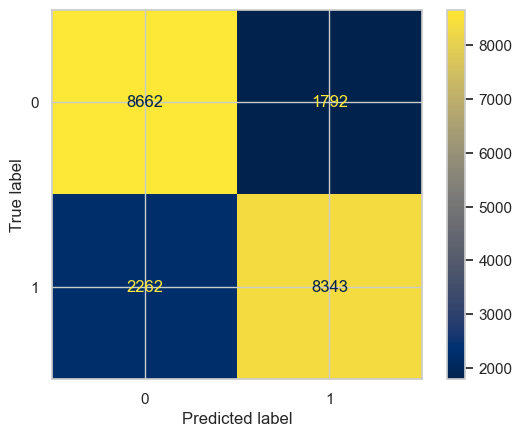

In [142]:
plt.figure(figsize=(2, 2))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,cmap='cividis')

In [143]:
from sklearn.neighbors import KNeighborsClassifier

In [144]:
KNN=KNeighborsClassifier(n_neighbors=10,algorithm='kd_tree')

In [145]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=10)

In [146]:
KNN_pred=KNN.predict(X_test)


In [147]:
print(classification_report(y_test,KNN_pred))
accuracy_score(y_test,KNN_pred)

              precision    recall  f1-score   support

           0       0.76      0.98      0.85     10454
           1       0.97      0.69      0.81     10605

    accuracy                           0.83     21059
   macro avg       0.86      0.83      0.83     21059
weighted avg       0.86      0.83      0.83     21059



0.832280735077639

In [148]:
from sklearn.ensemble import RandomForestClassifier

In [149]:
RFC=RandomForestClassifier(n_estimators=20,random_state=100,max_depth=15)

In [150]:
RFC.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, n_estimators=20, random_state=100)

In [151]:
RFC_y_pred=RFC.predict(X_test)

In [152]:
print(classification_report(y_test,RFC_y_pred))
print(accuracy_score(y_test,RFC_y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88     10454
           1       0.96      0.76      0.85     10605

    accuracy                           0.86     21059
   macro avg       0.88      0.86      0.86     21059
weighted avg       0.88      0.86      0.86     21059

0.8640961109264448


In [153]:
from sklearn.svm import SVC

In [154]:
Svm=SVC()

In [155]:
Svm.fit(X_train,y_train)

SVC()

In [157]:
Svm_pred=(Svm.predict(X_test))

In [158]:
print(classification_report(y_test,Svm_pred))
print(accuracy_score(y_test,Svm_pred))

              precision    recall  f1-score   support

           0       0.78      0.97      0.87     10454
           1       0.96      0.74      0.83     10605

    accuracy                           0.85     21059
   macro avg       0.87      0.85      0.85     21059
weighted avg       0.87      0.85      0.85     21059

0.8508001329597796


In [159]:
#pip install xgboost

In [160]:

from xgboost import XGBClassifier

In [161]:
xgb = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [162]:
xgb_predict=xgb.predict(X_test)


In [163]:
print(classification_report(y_test,xgb_predict))
print(accuracy_score(y_test,xgb_predict))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88     10454
           1       0.94      0.78      0.86     10605

    accuracy                           0.87     21059
   macro avg       0.88      0.87      0.87     21059
weighted avg       0.88      0.87      0.87     21059

0.8666128496129921


In [164]:
 from sklearn.neural_network import MLPClassifier

In [165]:
Mlp_c=MLPClassifier()

In [166]:
Mlp_c.fit(X_train,y_train)

MLPClassifier()

In [167]:
Mlp_predictions=Mlp_c.predict(X_test)

In [168]:
print(classification_report(y_test,Mlp_predictions))
print(accuracy_score(y_test,Mlp_predictions))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88     10454
           1       0.97      0.76      0.85     10605

    accuracy                           0.87     21059
   macro avg       0.89      0.87      0.87     21059
weighted avg       0.89      0.87      0.87     21059

0.8684647894012061


In [170]:
from sklearn.linear_model import RidgeClassifierCV


model = RidgeClassifierCV()

model.fit(X_train, y_train.values.ravel())

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,Mlp_predictions))
importances = model.coef_[0]
print(importances)

[[9517  937]
 [3367 7238]]
0.8684647894012061
[ 0.12403343  0.07408642  0.02068072  0.03757983  0.1817982   0.17333481
 -0.1473976   0.1102764   0.19598214  0.0086609   0.01122641  0.2494628
  0.00952427 -0.00939416 -0.02976928 -0.08355943]


In [171]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(solver='liblinear', multi_class='ovr', random_state = 0)

model = LogisticRegression(solver='liblinear', multi_class='ovr', random_state = 0)

model.fit(X_train, y_train.values.ravel())

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
importances = model.coef_[0]
print(importances)

[[9617  837]
 [2517 8088]]
0.8407331782135904
[ 0.19543681  0.12331769  0.0958051   0.1393428   1.567583    0.84569174
 -0.55583246  0.4316574   0.49339694  1.61781625  1.06574658  1.261545
  0.17534367 -0.0398446  -0.12868978 -0.34597581]


In [172]:
from sklearn.linear_model import PassiveAggressiveClassifier

model = PassiveAggressiveClassifier(random_state=0)
model.fit(X_train, y_train.values.ravel())

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
importances = model.coef_[0]
print(importances)

[[6597 3857]
 [1083 9522]]
0.7654209601595517
[ 0.15250385  0.05591403  0.06956506  0.08762489  0.9590467   0.53843718
 -0.34853214  0.23208065  0.34033406  0.99440305  0.42166547  0.77703554
  0.10590219 -0.05314103 -0.03105986 -0.27834439]


## Building a Neural Network using Keras

In [179]:
y_resampled.shape , X_resampled.shape

((70194,), (70194, 16))

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=100)

In [181]:
#X_nn=np.array(X_resampled)

In [182]:
model = Sequential()
model.add(Dense(16, input_shape=(X_train.shape[1],), activation='relu')) # Add an input shape! (features,)
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary() 



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


In [183]:
# compile the model
model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', 
                                   patience=10,
                                   restore_best_weights=True)

In [184]:
history = model.fit(X_train,
                    y_train,
                    callbacks=[es],
                    epochs=80, 
                    batch_size=10,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Epoch 1/80
3931/3931 [==============================] - 10s 2ms/step - loss: 0.3575 - accuracy: 0.8414 - val_loss: 0.3378 - val_accuracy: 0.8536
Epoch 2/80
3931/3931 [==============================] - 8s 2ms/step - loss: 0.3401 - accuracy: 0.8511 - val_loss: 0.3360 - val_accuracy: 0.8540
Epoch 3/80
3931/3931 [==============================] - 9s 2ms/step - loss: 0.3359 - accuracy: 0.8531 - val_loss: 0.3406 - val_accuracy: 0.8525
Epoch 4/80
3931/3931 [==============================] - 8s 2ms/step - loss: 0.3320 - accuracy: 0.8537 - val_loss: 0.3265 - val_accuracy: 0.8565
Epoch 5/80
3931/3931 [==============================] - 8s 2ms/step - loss: 0.3270 - accuracy: 0.8566 - val_loss: 0.3270 - val_accuracy: 0.8587
Epoch 6/80
3931/3931 [==============================] - 8s 2ms/step - loss: 0.3250 - accuracy: 0.8589 - val_loss: 0.3214 - val_accuracy: 0.8605
Epoch 7/80
3931/3931 [==============================] - 9s 2ms/step - loss: 0.3213 - accuracy: 0.8596 - val_loss: 0.3199 - val_accuracy

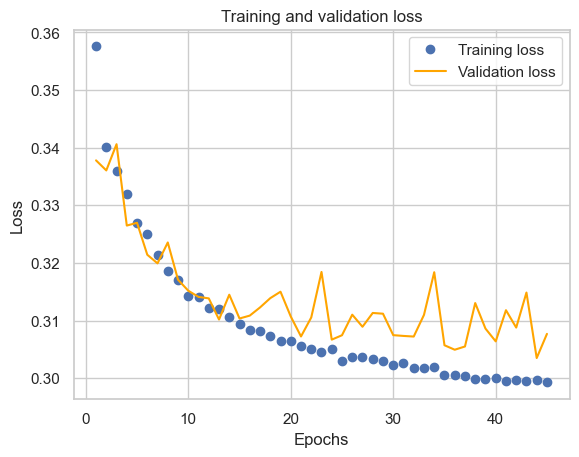

In [185]:
history_dict = history.history
# Learning curve(Loss)
# let's see the training and validation loss by epoch

# loss
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss'] 

# range of X (no. of epochs)
epochs = range(1, len(loss_values) + 1) 

# plot
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

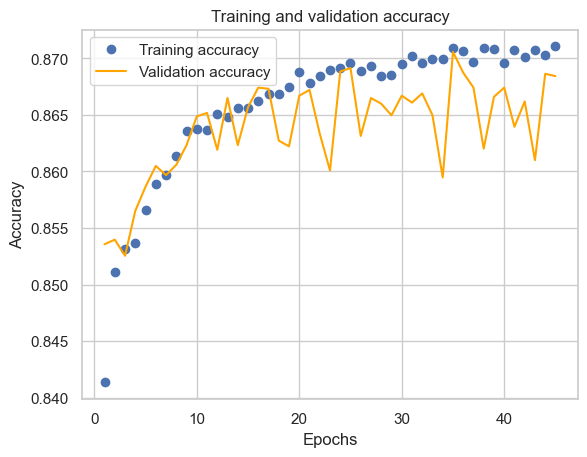

The Max Validation Accuracy is 0.8705607056617737
The Max Training Accuracy is 0.8710440397262573


In [186]:
# Learning curve(accuracy)
# let's see the training and validation accuracy by epoch

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# orange is for "orange"
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# this is the max value - should correspond to
# the HIGHEST train accuracy
print("The Max Validation Accuracy is", np.max(val_acc))
print("The Max Training Accuracy is", np.max(acc))

In [187]:
ANN_pred=model.predict(X_test)

659/659 [==============================] - 1s 1ms/step


In [188]:
ANN_predictions = np.round(ANN_pred)

In [192]:
print(classification_report(y_test,ANN_predictions))
print(accuracy_score(y_test,ANN_predictions))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88     10454
           1       0.95      0.77      0.85     10605

    accuracy                           0.87     21059
   macro avg       0.88      0.87      0.86     21059
weighted avg       0.88      0.87      0.86     21059

0.8658530794434683


In [190]:
print(confusion_matrix(y_test, ANN_predictions)) 

[[10039   415]
 [ 2410  8195]]


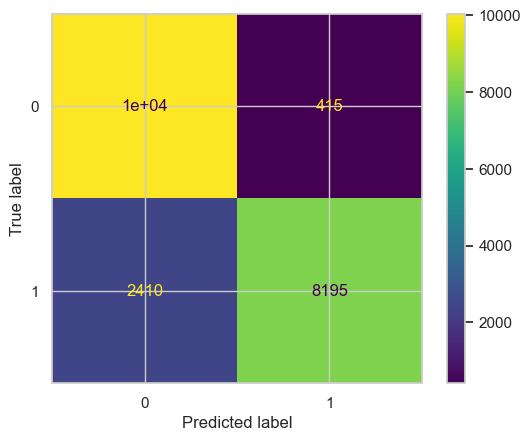

In [195]:
ConfusionMatrixDisplay.from_predictions(y_test, ANN_predictions,cmap='viridis')

In [191]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False, start_from_epoch=0)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 